# Question 2: How has creator content strategy evolved to reflect professional monetization approaches?

This analysis examines how creators adapt their content strategies as they transition toward monetization, leveraging the Youniverse dataset that combines channel metadata with temporal engagement metrics. Our methodological approach employs Dynamic Time Warping (DTW) to analyze the evolutionary trajectories of content creators, focusing specifically on the relationship between strategic changes and monetization patterns.
We begin by processing longitudinal data from Youniverse, extracting key temporal metrics including views, subscribers, upload patterns, and engagement rates. Using DTW allows us to align these creator trajectories meaningfully, accounting for the varying speeds at which different creators evolve in their journey toward professionalization. This alignment technique helps identify similar patterns in creator development, even when they occur at different time scales.
The analysis then generates a similarity matrix based on these aligned trajectories, enabling us to identify distinct groups of creators who follow similar paths in their professional evolution. By cross-referencing these trajectory clusters with monetization data from the channel metadata, we can pinpoint specific strategic shifts that coincide with monetization milestones. For the most representative channels in each cluster, we conduct detailed temporal analysis of their metrics and content strategies, revealing how creators systematically modify their approach as they transition toward professional content production.
This framework provides insights into how content creators evolve their strategies to support monetization, potentially revealing successful patterns in the progression from hobbyist to professional content creation. The findings will contribute to our understanding of professional development patterns in digital content creation and identify key strategic adaptations that accompany successful monetization approaches.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dtaidistance import dtw_ndim

In [3]:
data_path = "data/"

We start by loading the time serie data

In [4]:
# Time series data en
df_timeseries_en = pd.read_csv(os.path.join(data_path, "df_timeseries_en.tsv.gz"), compression="infer", sep="\t")

df_timeseries_en

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


To analyze monetization patterns, we extracted revenue stream indicators from video descriptions in the yt_metadata_en.jsonl.gz dataset. Our keyword detection system identified five distinct monetization categories:

- Membership: Identified through terms like "subscription," "member," "join button," "channel member," "membership," and "premium content," indicating direct viewer support through recurring payments.
- Crowdfunding: Detected using keywords such as "patreon," "ko-fi," "donation," "support us," "buy me a coffee," "gofundme," "paypal," "tip jar," and "patron," representing various forms of audience financial support.
- Merchandise: Tracked through terms including "merchandise," "merch," "shop," "store," "tshirt," "t-shirt," "hoodie," "apparel," and "limited edition," signaling product-based revenue.
- Sponsorship: Recognized via keywords like "sponsor," "sponsored," "partnership," "partner," "paid promotion," "#ad," "#sponsored," and "promotion," indicating brand collaboration revenue.
- Affiliate Marketing: Identified through terms such as "affiliate," "amazon link," "discount code," "promo code," "referral," "use code," and "commission," representing commission-based income.
We found that mseveral channels have mcombinations of these monetization types such youtube membership and anlternative types (crowdfunding, merchandise, sponsorship, affiliate).

In [5]:
df = pd.read_csv(os.path.join(data_path, "df_yt_monetization.csv"), sep=",")
df

,Unnamed: 0,channel_id,duration,upload_date,monetization_types
0,0,UCzWrhkg9eK5I8Bm3HfV-unA,1159,2016-09-28,none
1,1,UCzWrhkg9eK5I8Bm3HfV-unA,2681,2016-09-28,none
2,2,UCzWrhkg9eK5I8Bm3HfV-unA,1394,2016-09-28,none
3,3,UCzWrhkg9eK5I8Bm3HfV-unA,5064,2016-09-28,none
4,4,UCzWrhkg9eK5I8Bm3HfV-unA,3554,2016-09-28,none
...,...,...,...,...,...
72924789,72924789,UCrwE8kVqtIUVUzKui2WVpuQ,270,2017-02-06,membership
72924790,72924790,UCrwE8kVqtIUVUzKui2WVpuQ,878,2017-02-06,membership
72924791,72924791,UCrwE8kVqtIUVUzKui2WVpuQ,1003,2017-02-06,membership
72924792,72924792,UCrwE8kVqtIUVUzKui2WVpuQ,755,2017-02-06,affiliate|membership


# Data cleaning

In [6]:
df_timeseries_cleaned = df_timeseries_en.dropna()
df_timeseries_cleaned

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


We use traditional clustering methods directly on the channel metrics

In [7]:
# Get number of observations per channel
channel_counts = df_timeseries_cleaned.groupby('channel').size()

# Filter for channels with at least 2 points (or more if you want)
min_points = 2  # or could set higher like 5 or 10
valid_channels = channel_counts[channel_counts >= min_points].index

# Filter the time series data
df_filtered = df_timeseries_cleaned[df_timeseries_cleaned['channel'].isin(valid_channels)]

# Now create features for clustering
channel_features = df_filtered.groupby('channel').agg({
    'delta_views': ['mean', 'std'],
    'delta_subs': ['mean', 'std'],
    'delta_videos': ['mean', 'std'],
    'activity': ['mean', 'std'],
    'views': 'last',
    'subs': 'last',
    'videos': 'last'
}).reset_index()

# Flatten the column names
channel_features.columns = ['channel'] + [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in channel_features.columns[1:]]

# Verify no NaN values
print("Any remaining NaN values:", channel_features.isna().sum().sum())


print("Feature matrix shape:", channel_features.shape)
print("\nFeatures created:", channel_features.columns.tolist())

Any remaining NaN values: 0
Feature matrix shape: (133342, 12)

Features created: ['channel', 'delta_views_mean', 'delta_views_std', 'delta_subs_mean', 'delta_subs_std', 'delta_videos_mean', 'delta_videos_std', 'activity_mean', 'activity_std', 'views_last', 'subs_last', 'videos_last']


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# log transform the features to handle the large scale differences
feature_cols = [col for col in channel_features.columns if col != 'channel' and col != 'cluster']
X = channel_features[feature_cols].values
X_log = np.log1p(X)  # log1p handles zero values

# Scale the log-transformed features
X_scaled = StandardScaler().fit_transform(X_log)


Processing k=1...
Processing k=2...
Processing k=3...
Processing k=4...
Processing k=5...
Processing k=6...
Processing k=7...
Processing k=8...
Processing k=9...
Processing k=10...
Processing k=11...
Processing k=12...
Processing k=13...
Processing k=14...


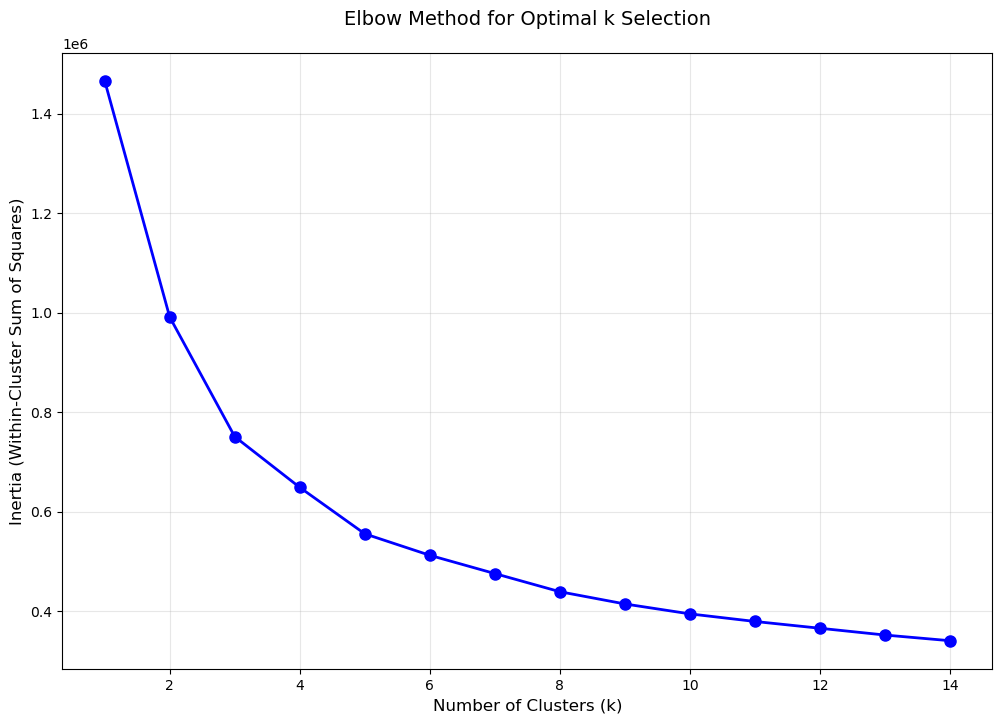

In [9]:
# Calculate inertia for different k values
inertias = []
K = range(1, 15)

for k in K:
    print(f"Processing k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Create figure
plt.figure(figsize=(12, 8))

# Plot Elbow curve
plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k Selection', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)


First we create a professionalization score, and cluster channels based on this.
Then for each cluster, extract the top ten channels based on the metrics and plot their metric trajectories


Cluster Statistics:

Cluster 0 (130,651 channels):
Average Professional Score: 0.201
Average Views: 36,605,382
Average Subscribers: 157,189
Upload Frequency: 1.7 videos/week

Cluster 1 (293 channels):
Average Professional Score: 0.280
Average Views: 5,540,840,507
Average Subscribers: 15,184,400
Upload Frequency: 10.9 videos/week

Cluster 2 (14 channels):
Average Professional Score: 0.479
Average Views: 26,480,479,759
Average Subscribers: 43,594,983
Upload Frequency: 64.1 videos/week

Cluster 3 (2,383 channels):
Average Professional Score: 0.214
Average Views: 995,470,561
Average Subscribers: 3,127,383
Upload Frequency: 30.4 videos/week

Cluster 4 (1 channels):
Average Professional Score: 0.999
Average Views: 84,114,834,335
Average Subscribers: 112,571,429
Upload Frequency: 26.9 videos/week

Total Explained Variance by first two components: 91.61%


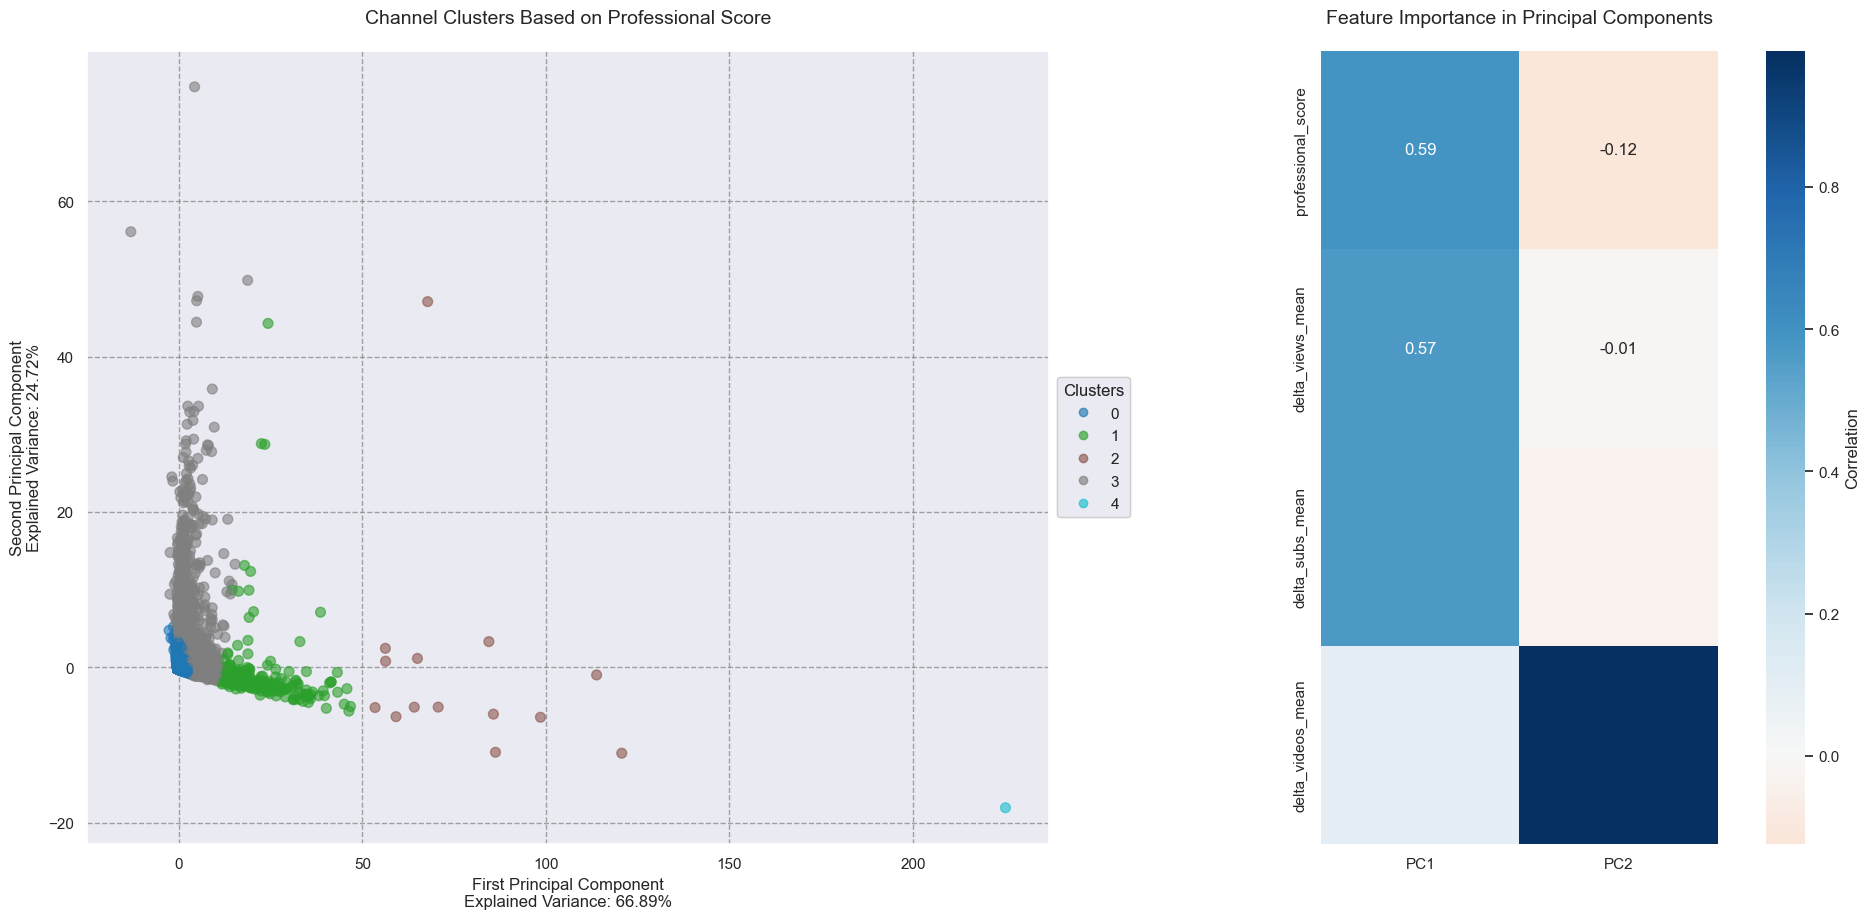

In [16]:

# Create professional score
channel_features['professional_score'] = (
    (channel_features['views_last'] / channel_features['views_last'].max()) * 0.4 +  # Weight views at 40%
    (channel_features['subs_last'] / channel_features['subs_last'].max()) * 0.4 +    # Weight subs at 40%
    (1 - channel_features['delta_videos_std'] / channel_features['delta_videos_std'].max()) * 0.2  # Weight consistency at 20%
)

# Select features for clustering
feature_cols = [
    'professional_score',
    'delta_views_mean',
    'delta_subs_mean',
    'delta_videos_mean'
]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
channel_features['cluster_new'] = kmeans.fit_predict(X_scaled)

# Create visualization
plt.figure(figsize=(20, 10))

# 1. Main PCA scatter plot
ax1 = plt.subplot(121)
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=channel_features['cluster_new'],
                     cmap='tab10',
                     alpha=0.6,
                     s=50)

ax1.grid(True, linestyle='--', alpha=0.7, color='gray')
ax1.set_xlabel(f'First Principal Component\nExplained Variance: {pca.explained_variance_ratio_[0]:.2%}',
               fontsize=12)
ax1.set_ylabel(f'Second Principal Component\nExplained Variance: {pca.explained_variance_ratio_[1]:.2%}',
               fontsize=12)
ax1.set_title('Channel Clusters Based on Professional Score', pad=20, fontsize=14)

# Add legend
legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="center left",
                    title="Clusters",
                    bbox_to_anchor=(1, 0.5))
ax1.add_artist(legend1)

# 2. Feature importance plot
ax2 = plt.subplot(122)
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_cols
)

sns.heatmap(feature_importance,
            cmap='RdBu',
            center=0,
            annot=True,
            fmt='.2f',
            ax=ax2,
            cbar_kws={'label': 'Correlation'},
            square=True)

ax2.set_title('Feature Importance in Principal Components', fontsize=14, pad=20)
plt.tight_layout(pad=3.0)

# Print cluster statistics
print("\nCluster Statistics:")
for cluster in range(5):
    mask = channel_features['cluster_new'] == cluster
    cluster_size = mask.sum()
    
    print(f"\nCluster {cluster} ({cluster_size:,} channels):")
    print(f"Average Professional Score: {channel_features[mask]['professional_score'].mean():.3f}")
    print(f"Average Views: {channel_features[mask]['views_last'].mean():,.0f}")
    print(f"Average Subscribers: {channel_features[mask]['subs_last'].mean():,.0f}")
    print(f"Upload Frequency: {channel_features[mask]['delta_videos_mean'].mean():.1f} videos/week")

print("\nTotal Explained Variance by first two components:",
      f"{sum(pca.explained_variance_ratio_):.2%}")

plt.show()

In [17]:
# Get top 10 channels for each cluster sorted by professional_score
for cluster in range(5):
   print(f"\nCluster {cluster} Top 10 Professional Channels:")
   print("=" * 80)
   
   # Filter cluster and sort by professional score
   top_10 = channel_features[channel_features['cluster_new'] == cluster] \
       .nlargest(10, 'professional_score') \
       .reset_index(drop=True)
   
   # Display results with additional metrics
   summary = top_10[['channel', 
                    'professional_score',
                    'views_last', 
                    'subs_last', 
                    'delta_videos_mean']].copy()
   
   # Format the numbers for better readability
   summary['professional_score'] = summary['professional_score'].map('{:.3f}'.format)
   summary['views_last'] = summary['views_last'].map('{:,.0f}'.format)
   summary['subs_last'] = summary['subs_last'].map('{:,.0f}'.format)
   summary['delta_videos_mean'] = summary['delta_videos_mean'].map('{:.2f}'.format)
   
   # Rename columns for display
   summary.columns = ['Channel', 
                     'Prof Score', 
                     'Views', 
                     'Subscribers', 
                     'Videos/Week']
   
   print(summary.to_string(index=False))


Cluster 0 Top 10 Professional Channels:
                 Channel Prof Score         Views Subscribers Videos/Week
UCN9wHzrHRdKVzCSeV-5RuzA      0.235 1,099,613,597   8,470,000        0.01
UCLCmJiSbIoa_ZFiBOBDf6ZA      0.232 2,043,483,774   6,450,000        2.17
UCq54nlcoX-0pLcN5RhxHyug      0.232 2,579,610,802   5,540,000        0.95
UCfLFTP1uTuIizynWsZq2nkQ      0.232 1,920,304,202   6,370,000        2.36
UCJZ7f6NQzGKZnFXzFW9y9UQ      0.231 2,830,279,047   5,020,000        1.14
UCQlGBspQdj17WOPBQMT1k9A      0.230 3,734,467,674   3,540,000        0.00
UCAaUVu8vYss8zCaC0WuA9jA      0.230   945,797,913   7,280,000        0.92
UCYjk_zY-iYR8YNfJmuzd70A      0.230 1,037,135,236   7,130,000        1.88
UCEe076nFuVobN0bAsXK7ICw      0.230 1,571,810,914   6,400,000        1.04
UCuj1Ms9_LCsQPSJ4p8nvOVA      0.230 1,860,104,524   5,930,000        4.38

Cluster 1 Top 10 Professional Channels:
                 Channel Prof Score          Views Subscribers Videos/Week
UCRijo3ddMTht_IHyNSNXpNQ     

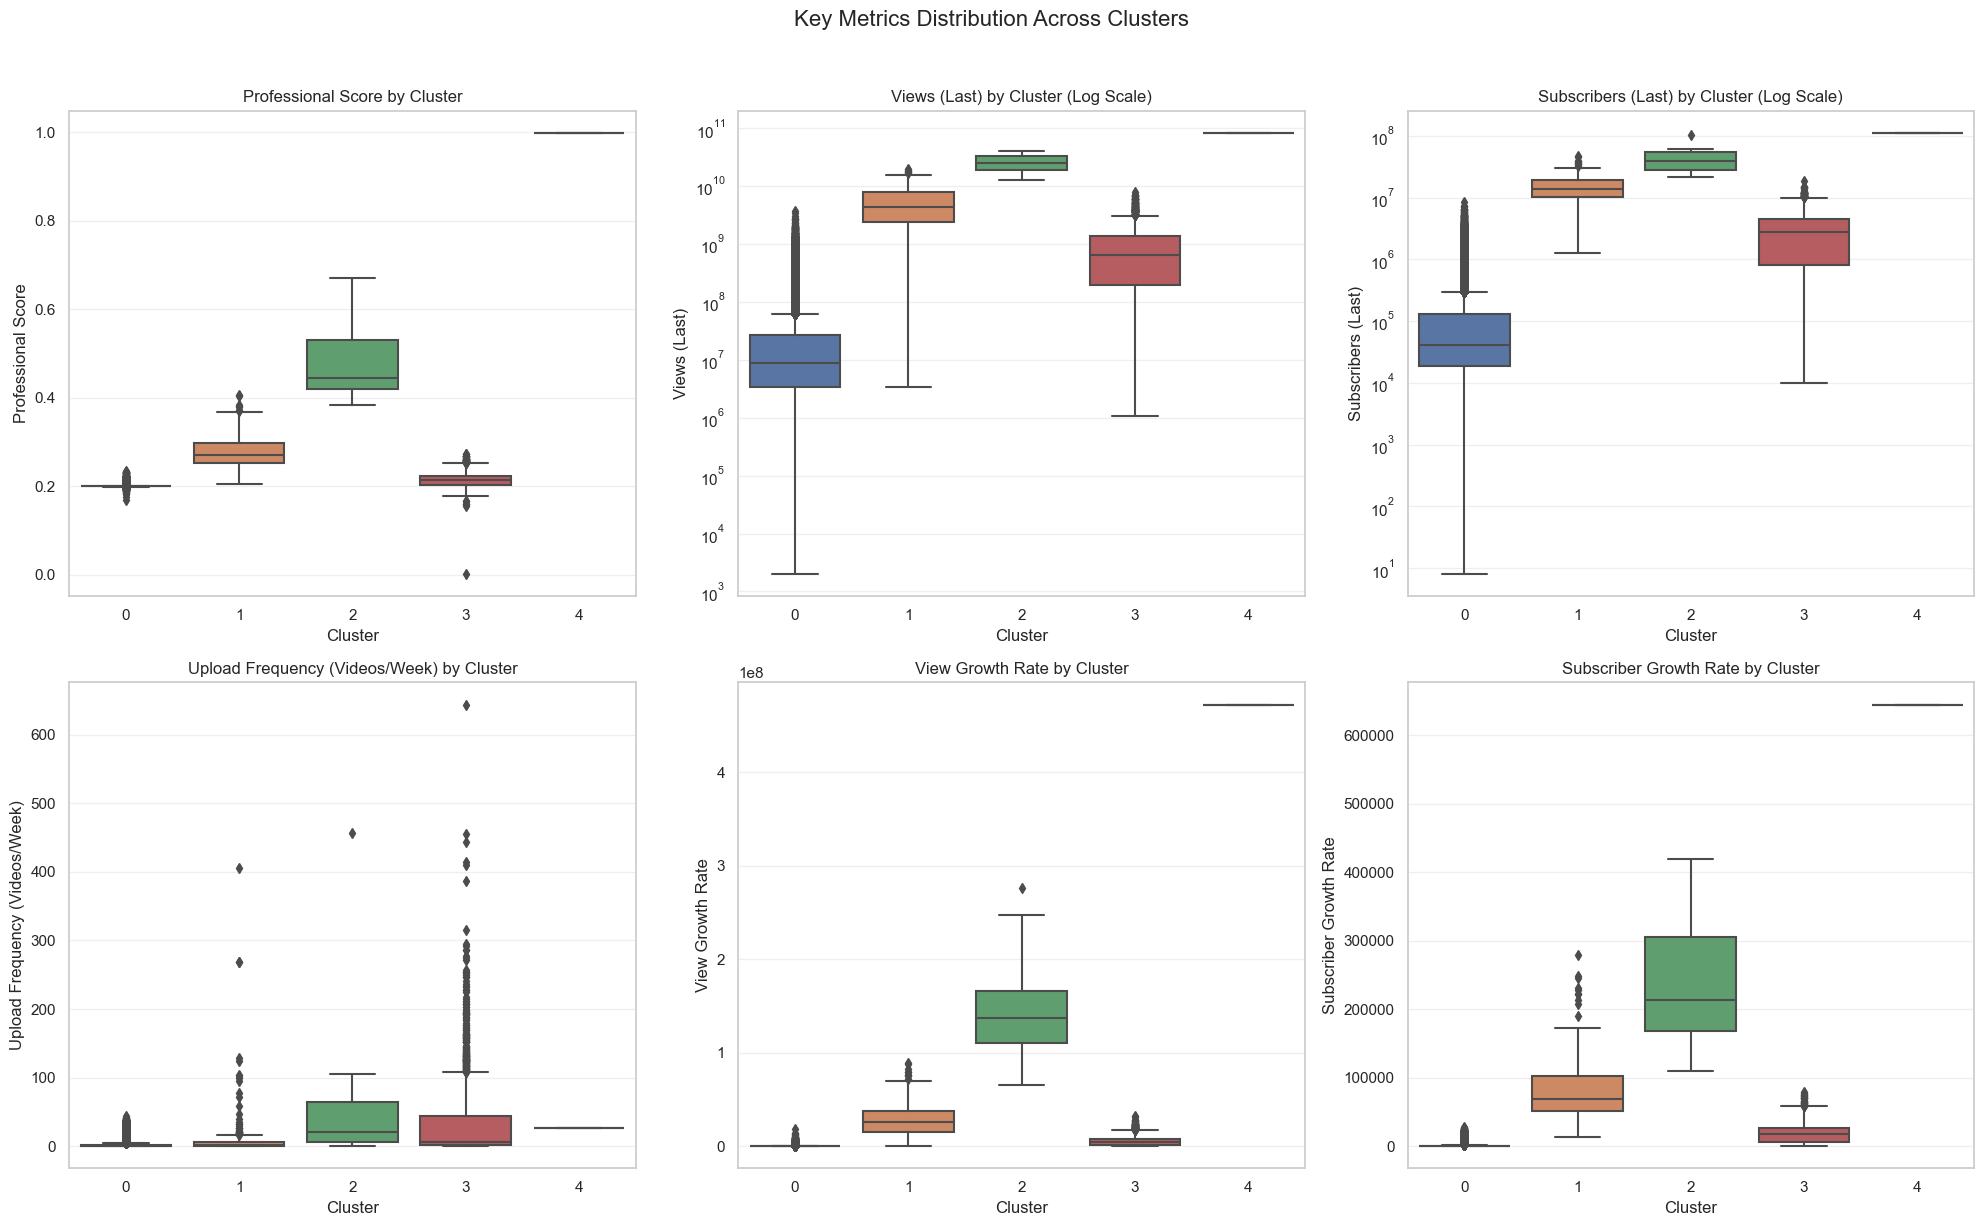


Cluster 0 Summary Statistics:
       Professional Score         Views  Subscribers  Upload Frequency  \
count           130651.00  1.306510e+05    130651.00         130651.00   
mean                 0.20  3.660538e+07    157189.20              1.68   
std                  0.00  1.022296e+08    350380.76              3.00   
min                  0.17  1.981020e+03         8.00              0.00   
25%                  0.20  3.333125e+06     18800.00              0.26   
50%                  0.20  8.706842e+06     41414.29              0.72   
75%                  0.20  2.635748e+07    128000.00              1.79   
max                  0.24  3.734468e+09   8470000.00             44.08   

       View Growth  Sub Growth  
count    130651.00   130651.00  
mean     216064.00      926.69  
std      523290.80     1983.81  
min           0.00        0.00  
25%       20200.86       98.61  
50%       53560.60      244.38  
75%      166843.36      781.01  
max    18196882.57    27363.53  

Clus

In [19]:
# Create a figure with multiple subplots for key metrics
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Key Metrics Distribution Across Clusters', fontsize=16, y=1.02)

# List of metrics to plot
metrics = [
    ('professional_score', 'Professional Score'),
    ('views_last', 'Views (Last)'),
    ('subs_last', 'Subscribers (Last)'),
    ('delta_videos_mean', 'Upload Frequency (Videos/Week)'),
    ('delta_views_mean', 'View Growth Rate'),
    ('delta_subs_mean', 'Subscriber Growth Rate')
]

# Create box plots for each metric
for idx, (metric, title) in enumerate(metrics):
    ax = axes[idx//3, idx%3]
    
    # Create box plot
    sns.boxplot(data=channel_features, x='cluster_new', y=metric, ax=ax)
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel(title)
    ax.set_title(f'{title} by Cluster')
    
    # If the values are very large, use log scale
    if metric in ['views_last', 'subs_last']:
        ax.set_yscale('log')
        ax.set_title(f'{title} by Cluster (Log Scale)')

plt.tight_layout()
plt.show()

# Print summary statistics for each cluster
for cluster in range(5):
    print(f"\nCluster {cluster} Summary Statistics:")
    print("=" * 50)
    cluster_data = channel_features[channel_features['cluster_new'] == cluster]
    
    summary_stats = pd.DataFrame({
        'Professional Score': cluster_data['professional_score'].describe(),
        'Views': cluster_data['views_last'].describe(),
        'Subscribers': cluster_data['subs_last'].describe(),
        'Upload Frequency': cluster_data['delta_videos_mean'].describe(),
        'View Growth': cluster_data['delta_views_mean'].describe(),
        'Sub Growth': cluster_data['delta_subs_mean'].describe()
    }).round(2)
    
    print(summary_stats)

Cluster 0 (Low Performance):
- Lowest professional score (~0.2)
- Lowest views and subscribers (10^3-10^7 range)
- Very low upload frequency (near 0 videos/week)
- Minimal growth in views and subscribers

Cluster 1 (Growing Mid-Tier):
- Moderate professional score (~0.3)
- Medium-level views (10^9-10^10) and subscribers (10^6-10^7)
- Low but consistent upload frequency (few outliers up to 100 videos/week)
- Moderate growth rates in both views and subscribers

Cluster 2 (Top Performers):
- High professional score (~0.4-0.5)
- Highest views (around 10^10) and subscribers (10^7-10^8)
- Moderate upload frequency (median around 50 videos/week)
- Highest view and subscriber growth rates
- Most consistent performance across metrics

Cluster 3 (Inconsistent Performers):
- Low-medium professional score (~0.2-0.25)
- Medium-range views and subscribers
- Very variable upload frequency (many outliers up to 400 videos/week)
- Low growth rates but with some outliers

Cluster 4 (Single Channel/Outlier):
- Appears to be a single channel or very small cluster
- Maximum professional score (1.0)
- High metrics across most categories
- Could be worth investigating separately

This clustering seems to have effectively separated channels into meaningful groups based on their professional characteristics.

In [57]:
def plot_upload_trajectory(cluster, channel_index, window):
    """
    cluster : can be 0, 1, 2, 3, or 4
    channel_index: index of one of the top ten channels in the cluster (0, 1, ..., 9)
    window: weekly window, goes from 1 to 52 weeks (a year)
    """
    # Get the same channel data
    top_channel = channel_features[channel_features['cluster_new'] == cluster] \
        .nlargest(10, 'professional_score')['channel'].iloc[channel_index]

    channel_data = df_timeseries_cleaned[df_timeseries_cleaned['channel'] == top_channel].copy()
    channel_data['datetime'] = pd.to_datetime(channel_data['datetime'])

    # Weekly aggregation instead of monthly
    weekly_data = channel_data.set_index('datetime') \
        .resample('W') \
        .agg({
            'delta_videos': ['sum', 'std'],
            'videos': 'last'
        }).reset_index()

    weekly_data.columns = ['datetime', 'uploads', 'uploads_std', 'total_videos']

    # Create plot with multiple rolling windows
    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")

    # Main line plot
    ax1 = plt.gca()
    #ax1.plot(weekly_data['datetime'], weekly_data['uploads'], color='blue', label='Weekly uploads', alpha=0.7)

    # Add different rolling averages
    windows = [window]  # ~6 months and yearly in weeks
    colors = ['red', 'green']
    styles = ['--', ':']

    for window, color, style in zip(windows, colors, styles):
        rolling_mean = weekly_data['uploads'].rolling(window=window).mean()
        ax1.plot(weekly_data['datetime'], rolling_mean,
                color=color, linestyle=style,
                label=f'{window}-week rolling average',
                linewidth=2)

    # Customize the plot
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Number of Videos Uploaded', fontsize=12)
    ax1.set_title(f'Weekly Upload Evolution for {top_channel}', fontsize=14, pad=20)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Add statistics
    stats_text = f"""
    Channel Statistics:
    Total Videos: {weekly_data['total_videos'].iloc[-1]:,.0f}
    Avg Weekly Uploads: {weekly_data['uploads'].mean():.1f}
    Overall Std Dev: {weekly_data['uploads'].std():.1f}
    Yearly Average (last 52w): {weekly_data['uploads'].tail(52).mean():.1f}
    Semi-Annual Average (last 26w): {weekly_data['uploads'].tail(26).mean():.1f}
    """

    plt.text(0.02, 0.98, stats_text,
            transform=ax1.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

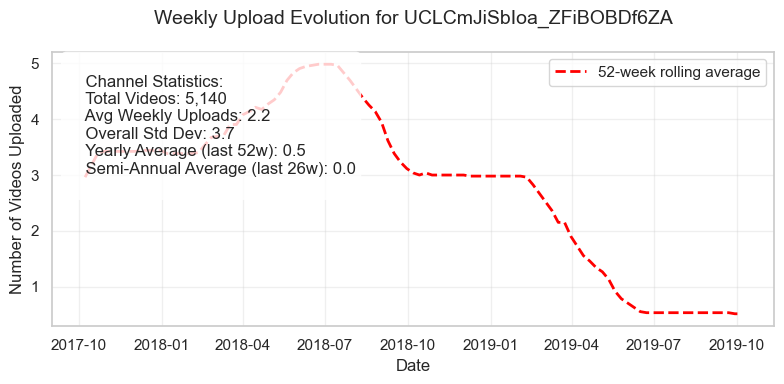

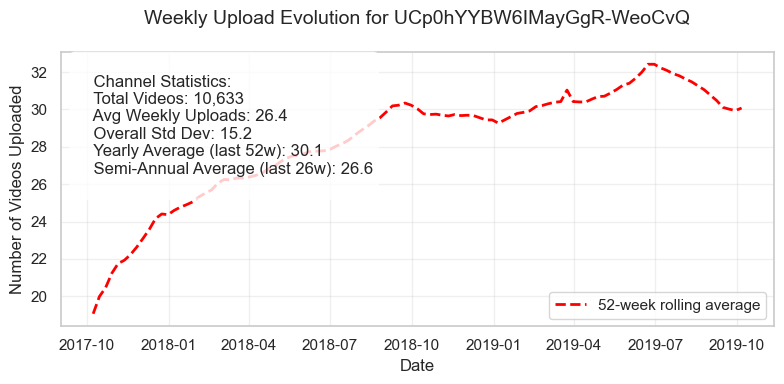

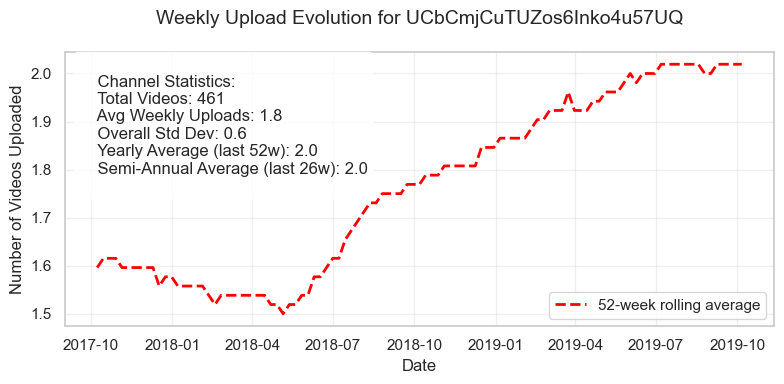

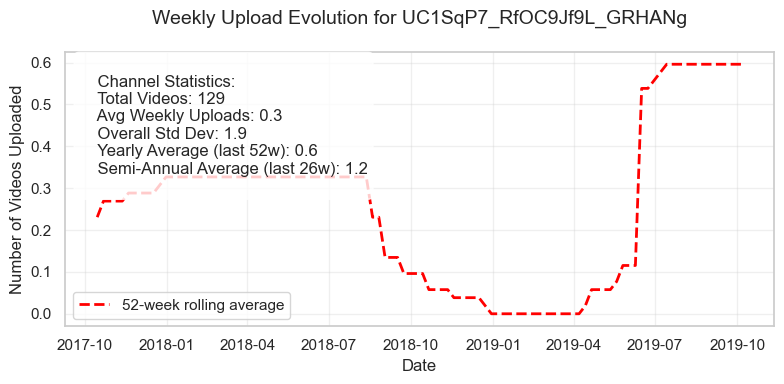

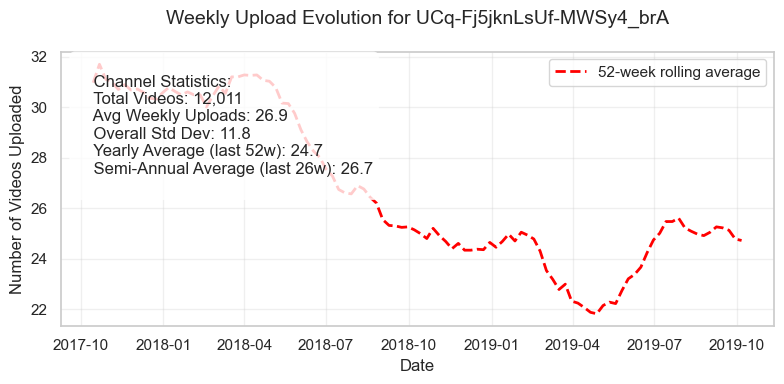

In [58]:
plot_upload_trajectory(cluster=0, channel_index=1, window=52) 
plot_upload_trajectory(cluster=1, channel_index=1, window=52) 
plot_upload_trajectory(cluster=2, channel_index=1, window=52) 
plot_upload_trajectory(cluster=3, channel_index=1, window=52) 
plot_upload_trajectory(cluster=4, channel_index=0, window=52) 

Now we load the monetization data

In [52]:
df_monetization = pd.read_csv(os.path.join(data_path, "df_yt_monetization.csv"), sep=",")
df_monetization

,Unnamed: 0,channel_id,duration,upload_date,monetization_types
0,0,UCzWrhkg9eK5I8Bm3HfV-unA,1159,2016-09-28,none
1,1,UCzWrhkg9eK5I8Bm3HfV-unA,2681,2016-09-28,none
2,2,UCzWrhkg9eK5I8Bm3HfV-unA,1394,2016-09-28,none
3,3,UCzWrhkg9eK5I8Bm3HfV-unA,5064,2016-09-28,none
4,4,UCzWrhkg9eK5I8Bm3HfV-unA,3554,2016-09-28,none
...,...,...,...,...,...
72924789,72924789,UCrwE8kVqtIUVUzKui2WVpuQ,270,2017-02-06,membership
72924790,72924790,UCrwE8kVqtIUVUzKui2WVpuQ,878,2017-02-06,membership
72924791,72924791,UCrwE8kVqtIUVUzKui2WVpuQ,1003,2017-02-06,membership
72924792,72924792,UCrwE8kVqtIUVUzKui2WVpuQ,755,2017-02-06,affiliate|membership


In [ ]:

  # First we merge the data and process monetization dates
def prepare_monetization_timeseries():
    # Convert datetime to consistent format in timeseries data
    df_timeseries_cleaned['datetime'] = pd.to_datetime(df_timeseries_cleaned['datetime'])
    
    # Convert upload_date to datetime in monetization data
    df_monetization['upload_date'] = pd.to_datetime(df_monetization['upload_date'])
    
    # Merge the datasets
    merged_df = df_timeseries_cleaned.merge(
        df_monetization[['channel_id', 'upload_date', 'monetization_types']],
        left_on=['channel', 'datetime'],
        right_on=['channel_id', 'upload_date'],
        how='left'
    )
    
    # Get first monetization date for each channel
    first_monetization = merged_df[merged_df['monetization_types'].notna()].groupby('channel').agg({
        'datetime': 'min'
    }).rename(columns={'datetime': 'first_monetization_date'})
    
    # Merge first monetization date back to main dataset
    final_df = merged_df.merge(
        first_monetization,
        left_on='channel',
        right_index=True,
        how='left'
    )
    
    # Calculate weeks from monetization
    final_df['weeks_from_monetization'] = (
        (final_df['datetime'] - final_df['first_monetization_date']).dt.total_seconds() / 
        (7 * 24 * 60 * 60)
    )
    
    # Add monetization status flag
    final_df['is_monetized'] = final_df['monetization_types'].notna()
    
    return final_df

# Create the merged dataset
merged_timeseries = prepare_monetization_timeseries()

# Function to analyze a channel with the merged data
def analyze_channel_trajectory_with_monetization(cluster, channel_index, window=52):
    """
    Analyzes channel upload patterns with monetization using merged dataset
    
    Parameters:
    cluster : int (0-4) - cluster number
    channel_index : int (0-9) - index of channel within top 10 of cluster
    window : int - rolling window size in weeks
    """
    # Get top channel from specified cluster
    top_channel = channel_features[channel_features['cluster_new'] == cluster] \
        .nlargest(10, 'professional_score')['channel'].iloc[channel_index]
    
    print(f"Analyzing channel: {top_channel}")
    
    # Get channel data
    channel_data = merged_timeseries[merged_timeseries['channel'] == top_channel].copy()
    
    # Weekly aggregation
    weekly_data = channel_data.set_index('datetime') \
        .resample('W') \
        .agg({
            'delta_videos': 'sum',
            'videos': 'last',
            'is_monetized': 'max',  # Will be True if any day in week was monetized
            'first_monetization_date': 'first'
        }).reset_index()
    
    weekly_data.columns = ['datetime', 'uploads', 'total_videos', 'is_monetized', 'monetization_date']
    
    # Create plot
    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")
    
    ax1 = plt.gca()
    
    # Add rolling average
    rolling_mean = weekly_data['uploads'].rolling(window=window).mean()
    ax1.plot(weekly_data['datetime'], rolling_mean,
            color='red', linestyle='--',
            label=f'{window}-week rolling average',
            linewidth=2)
    
    # Add monetization date if available
    monetization_date = weekly_data['monetization_date'].iloc[0]
    if pd.notna(monetization_date):
        ax1.axvline(x=monetization_date, color='blue', linestyle='--', 
                   label='Monetization Date', alpha=0.7)
        
        # Add shading for before/after monetization
        ax1.axvspan(weekly_data['datetime'].min(), monetization_date,
                   alpha=0.1, color='red', label='Pre-monetization')
        ax1.axvspan(monetization_date, weekly_data['datetime'].max(),
                   alpha=0.1, color='green', label='Post-monetization')
        
        # Calculate before/after statistics
        before_monetization = weekly_data[weekly_data['datetime'] < monetization_date]['uploads']
        after_monetization = weekly_data[weekly_data['datetime'] >= monetization_date]['uploads']
        
        stats_text = f"""
Channel Statistics:
Total Videos: {weekly_data['total_videos'].iloc[-1]:,.0f}
Pre-monetization Avg: {before_monetization.mean():.1f}
Post-monetization Avg: {after_monetization.mean():.1f}
Yearly Average (last 52w): {weekly_data['uploads'].tail(52).mean():.1f}
Semi-Annual Average (last 26w): {weekly_data['uploads'].tail(26).mean():.1f}
Monetization Date: {monetization_date.strftime('%Y-%m-%d')}
"""
    else:
        stats_text = f"""
Channel Statistics:
Total Videos: {weekly_data['total_videos'].iloc[-1]:,.0f}
Avg Weekly Uploads: {weekly_data['uploads'].mean():.1f}
Yearly Average (last 52w): {weekly_data['uploads'].tail(52).mean():.1f}
Semi-Annual Average (last 26w): {weekly_data['uploads'].tail(26).mean():.1f}
Not Monetized
"""
    
    # Customize the plot
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Number of Videos Uploaded', fontsize=12)
    ax1.set_title(f'Weekly Upload Evolution for {top_channel}', fontsize=14, pad=20)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    plt.text(0.02, 0.98, stats_text,
            transform=ax1.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print additional monetization impact statistics if available
    if pd.notna(monetization_date):
        print("\nMonetization Impact Analysis:")
        print("-" * 50)
        print(f"Average weekly uploads before monetization: {before_monetization.mean():.2f}")
        print(f"Average weekly uploads after monetization: {after_monetization.mean():.2f}")
        print(f"Percent change: {((after_monetization.mean() / before_monetization.mean()) - 1) * 100:.1f}%")



In [ ]:
analyze_channel_trajectory_with_monetization(cluster=2, channel_index=1)

/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/467003122.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_cleaned['date'] = pd.to_datetime(df_timeseries_cleaned['datetime']).dt.date


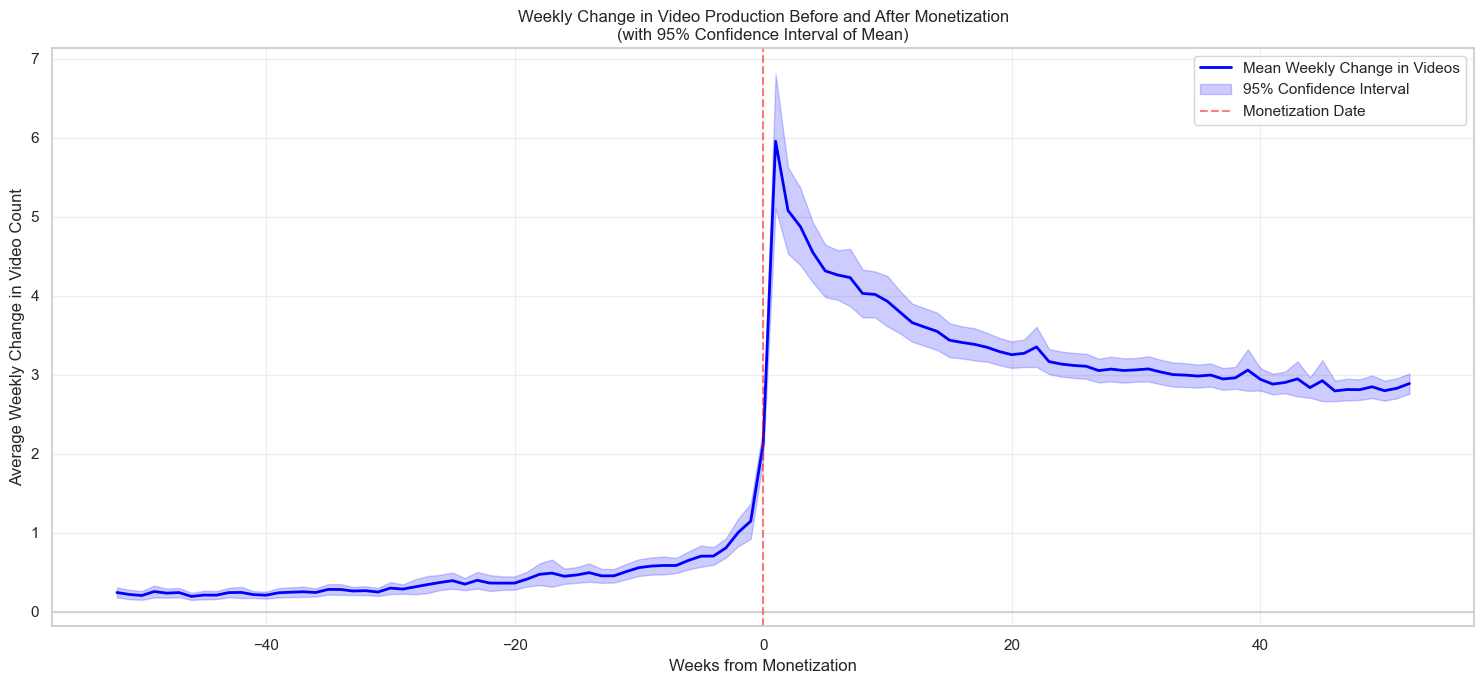


Summary Statistics (Weekly Changes):
--------------------------------------------------

3 months before:
Average weekly change: 0.85
95% CI: (0.81, 0.89)
Number of observations: 189094
Number of channels: 19209

3 months after:
Average weekly change: 4.19
95% CI: (4.09, 4.30)
Number of observations: 390641
Number of channels: 38285

6 months before:
Average weekly change: 0.68
95% CI: (0.65, 0.70)
Number of observations: 317463
Number of channels: 19350

6 months after:
Average weekly change: 3.71
95% CI: (3.66, 3.77)
Number of observations: 894546
Number of channels: 47317


In [95]:
from scipy import stats

# First find the earliest monetization date per channel
first_monetization = df_monetization[df_monetization['monetization_types'] != 'none'].groupby('channel_id')['upload_date'].min().reset_index()
first_monetization.columns = ['channel', 'first_monetization_date']

# Convert timeseries datetime column to date format for merging
df_timeseries_cleaned['date'] = pd.to_datetime(df_timeseries_cleaned['datetime']).dt.date

# Merge the datasets
merged_df = pd.merge(df_timeseries_cleaned, first_monetization, on='channel', how='left')

# Calculate weeks from monetization
merged_df['weeks_from_monetization'] = (pd.to_datetime(merged_df['date']) - 
                                      pd.to_datetime(merged_df['first_monetization_date'])).dt.days // 7

# Focus on a window of 52 weeks before and after monetization
window_df = merged_df[merged_df['weeks_from_monetization'].between(-52, 52)]

# Calculate weekly stats - modified approach
weekly_means = window_df.groupby('weeks_from_monetization')['delta_videos'].mean()
weekly_counts = window_df.groupby('weeks_from_monetization')['delta_videos'].count()
weekly_sems = window_df.groupby('weeks_from_monetization')['delta_videos'].apply(lambda x: stats.sem(x, nan_policy='omit'))

# Create the statistics dataframe
weekly_stats = pd.DataFrame({
    'mean': weekly_means,
    'count': weekly_counts,
    'sem': weekly_sems
})
weekly_stats = weekly_stats.reset_index()

# Calculate confidence intervals
weekly_stats['ci_lower'] = weekly_stats['mean'] - 1.96 * weekly_stats['sem']
weekly_stats['ci_upper'] = weekly_stats['mean'] + 1.96 * weekly_stats['sem']

# Plotting
plt.figure(figsize=(15, 7))

# Plot mean line
plt.plot(weekly_stats['weeks_from_monetization'], 
         weekly_stats['mean'], 
         color='blue', 
         linewidth=2,
         label='Mean Weekly Change in Videos')

# Add 95% confidence interval bands
plt.fill_between(weekly_stats['weeks_from_monetization'],
                weekly_stats['ci_lower'],
                weekly_stats['ci_upper'],
                color='blue',
                alpha=0.2,
                label='95% Confidence Interval')

# Add vertical line at monetization date
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Monetization Date')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Formatting
plt.title('Weekly Change in Video Production Before and After Monetization\n(with 95% Confidence Interval of Mean)')
plt.xlabel('Weeks from Monetization')
plt.ylabel('Average Weekly Change in Video Count')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics (Weekly Changes):")
print("-" * 50)
periods = {
    "3 months before": (-12, 0),
    "3 months after": (0, 12),
    "6 months before": (-24, 0),
    "6 months after": (0, 24)
}

for period, (start, end) in periods.items():
    period_data = window_df[window_df['weeks_from_monetization'].between(start, end)]
    mean = period_data['delta_videos'].mean()
    n = len(period_data)
    se = stats.sem(period_data['delta_videos'], nan_policy='omit')
    ci_lower = mean - 1.96 * se
    ci_upper = mean + 1.96 * se
    
    print(f"\n{period}:")
    print(f"Average weekly change: {mean:.2f}")
    print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")
    print(f"Number of observations: {n}")
    print(f"Number of channels: {period_data['channel'].nunique()}")

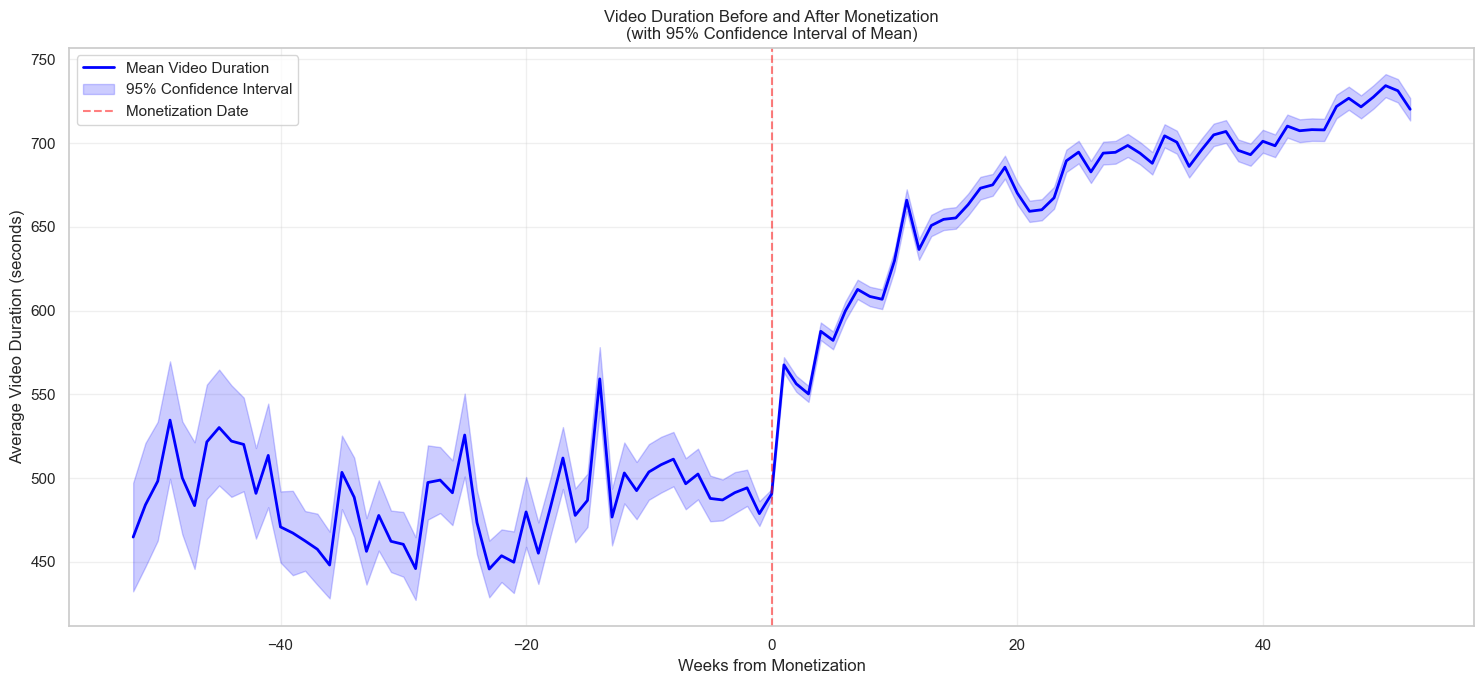


Summary Statistics (Video Duration):
--------------------------------------------------

3 months before:
Average duration: 491.46 seconds
Median duration: 211.00 seconds
95% CI: (489.21, 493.70)
Number of videos: 1385541
Number of channels: 133041

3 months after:
Average duration: 579.01 seconds
Median duration: 225.00 seconds
95% CI: (577.61, 580.40)
Number of videos: 4875237
Number of channels: 133041

6 months before:
Average duration: 490.21 seconds
Median duration: 211.00 seconds
95% CI: (488.14, 492.27)
Number of videos: 1601022
Number of channels: 133041

6 months after:
Average duration: 615.30 seconds
Median duration: 236.00 seconds
95% CI: (614.17, 616.43)
Number of videos: 8302998
Number of channels: 133041

1 year before:
Average duration: 489.75 seconds
Median duration: 211.00 seconds
95% CI: (487.86, 491.65)
Number of videos: 1867559
Number of channels: 133041

1 year after:
Average duration: 658.47 seconds
Median duration: 252.00 seconds
95% CI: (657.62, 659.32)
Numbe

In [142]:
from scipy import stats

def analyze_duration_around_monetization():
    # First find the earliest monetization date per channel
    first_monetization = df_monetization[df_monetization['monetization_types'] != 'none'].groupby('channel_id')['upload_date'].min().reset_index()
    first_monetization.columns = ['channel', 'first_monetization_date']
    
    # Create date column for merging
    df_monetization['date'] = pd.to_datetime(df_monetization['upload_date']).dt.date
    
    # Merge monetization dates with duration data
    merged_df = pd.merge(df_monetization, first_monetization, 
                        left_on='channel_id', right_on='channel', 
                        how='left')
    
    # Calculate weeks from monetization
    merged_df['weeks_from_monetization'] = (pd.to_datetime(merged_df['date']) - 
                                          pd.to_datetime(merged_df['first_monetization_date'])).dt.days // 7
    
    # Focus on a window of 52 weeks before and after monetization
    window_df = merged_df[merged_df['weeks_from_monetization'].between(-52, 52)]
    
    # Calculate weekly stats
    weekly_means = window_df.groupby('weeks_from_monetization')['duration'].mean()
    weekly_counts = window_df.groupby('weeks_from_monetization')['duration'].count()
    weekly_sems = window_df.groupby('weeks_from_monetization')['duration'].apply(
        lambda x: stats.sem(x, nan_policy='omit')
    )
    
    # Create the statistics dataframe
    weekly_stats = pd.DataFrame({
        'mean': weekly_means,
        'count': weekly_counts,
        'sem': weekly_sems
    })
    weekly_stats = weekly_stats.reset_index()
    
    # Calculate confidence intervals
    weekly_stats['ci_lower'] = weekly_stats['mean'] - 1.96 * weekly_stats['sem']
    weekly_stats['ci_upper'] = weekly_stats['mean'] + 1.96 * weekly_stats['sem']
    
    # Plotting
    plt.figure(figsize=(15, 7))
    
    # Plot mean line
    plt.plot(weekly_stats['weeks_from_monetization'],
             weekly_stats['mean'],
             color='blue',
             linewidth=2,
             label='Mean Video Duration')
    
    # Add 95% confidence interval bands
    plt.fill_between(weekly_stats['weeks_from_monetization'],
                    weekly_stats['ci_lower'],
                    weekly_stats['ci_upper'],
                    color='blue',
                    alpha=0.2,
                    label='95% Confidence Interval')
    
    # Add vertical line at monetization date
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Monetization Date')
    
    # Formatting
    plt.title('Video Duration Before and After Monetization\n(with 95% Confidence Interval of Mean)')
    plt.xlabel('Weeks from Monetization')
    plt.ylabel('Average Video Duration (seconds)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics (Video Duration):")
    print("-" * 50)
    periods = {
        "3 months before": (-12, 0),
        "3 months after": (0, 12),
        "6 months before": (-24, 0),
        "6 months after": (0, 24),
        "1 year before": (-52, 0),
        "1 year after": (0, 52)
    }
    
    for period, (start, end) in periods.items():
        period_data = window_df[window_df['weeks_from_monetization'].between(start, end)]
        mean = period_data['duration'].mean()
        median = period_data['duration'].median()
        n = len(period_data)
        se = stats.sem(period_data['duration'], nan_policy='omit')
        ci_lower = mean - 1.96 * se
        ci_upper = mean + 1.96 * se
        
        print(f"\n{period}:")
        print(f"Average duration: {mean:.2f} seconds")
        print(f"Median duration: {median:.2f} seconds")
        print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")
        print(f"Number of videos: {n}")
        print(f"Number of channels: {period_data['channel_id'].nunique()}")
    
    # Conduct statistical tests
    before_data = window_df[window_df['weeks_from_monetization'].between(-52, -1)]['duration']
    after_data = window_df[window_df['weeks_from_monetization'].between(0, 52)]['duration']
    
    t_stat, p_value = stats.ttest_ind(before_data, after_data, nan_policy='omit')
    
    print("\nStatistical Test:")
    print("-" * 50)
    print("Independent t-test (before vs after monetization):")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_value:.4f}")
    
    # Calculate effect size (Cohen's d)
    d = (after_data.mean() - before_data.mean()) / np.sqrt((after_data.var() + before_data.var()) / 2)
    print(f"Effect size (Cohen's d): {d:.3f}")

# Run the analysis
analyze_duration_around_monetization()

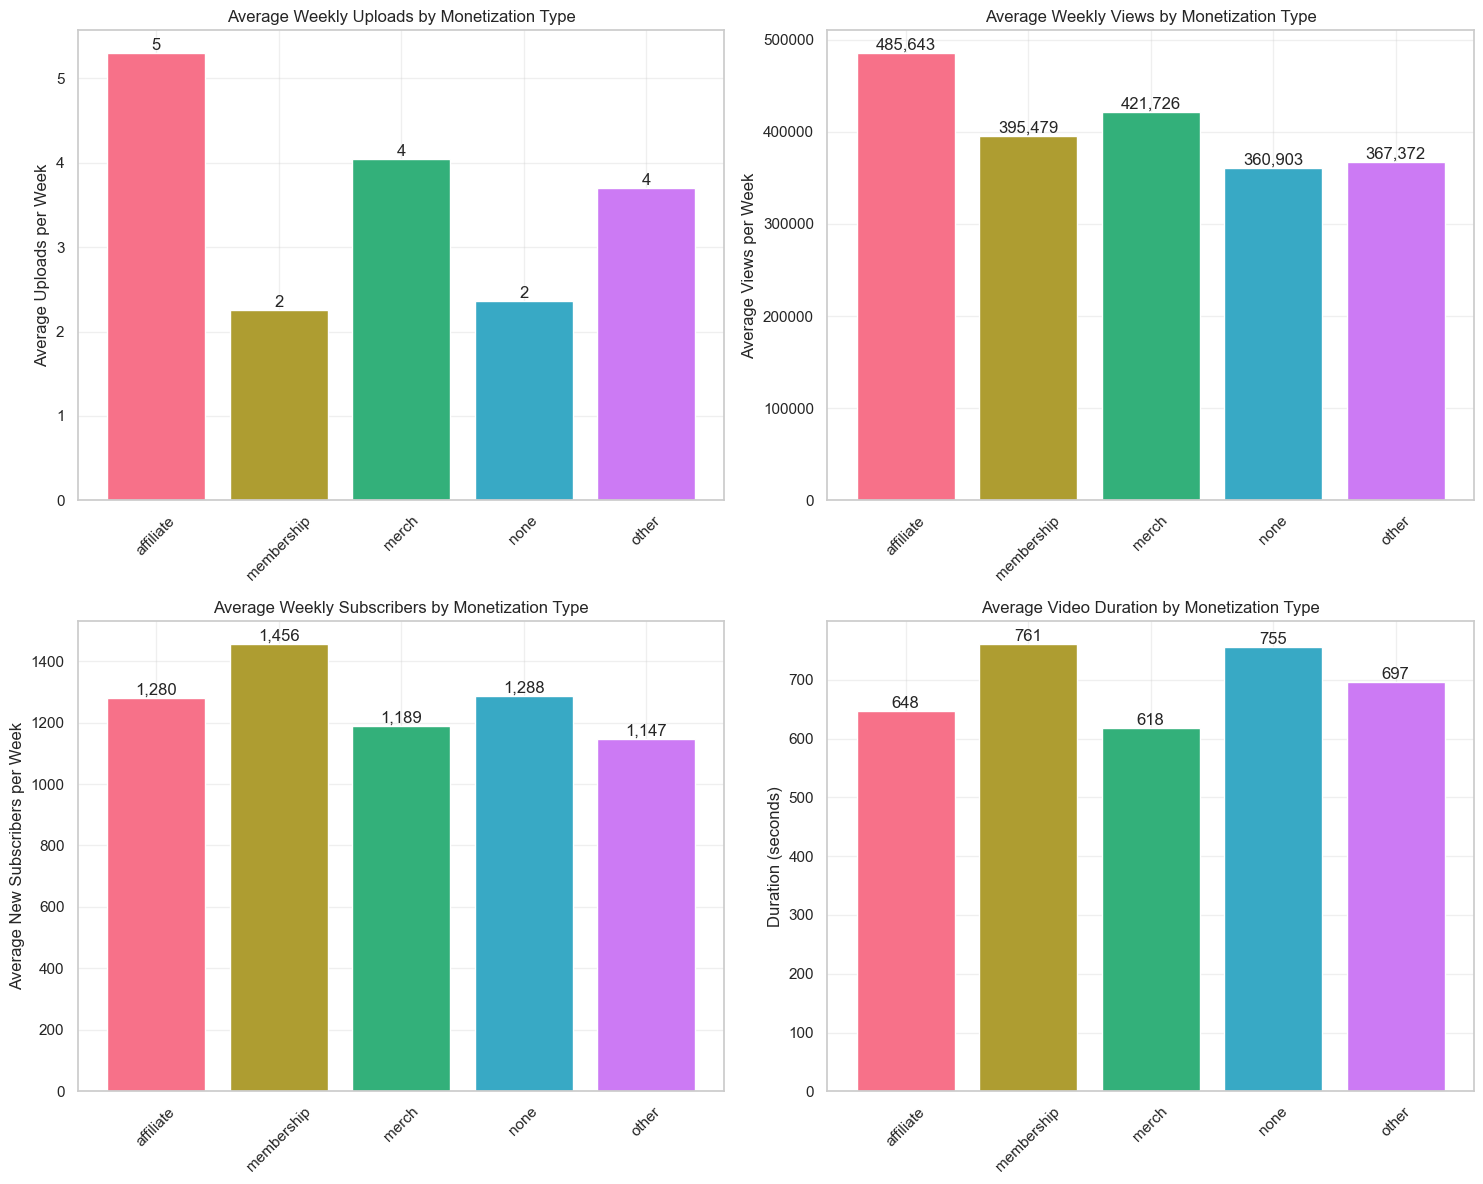


Detailed Statistics by Main Monetization Type:

Monetization Type: affiliate
--------------------------------------------------
Number of Channels: 17,806

Uploads:
  Average per week: 5.30
  Median per week: 1.45

Views:
  Average per week: 485,643
  Median per week: 51,500

Subscribers:
  Average per week: 1279.94
  Median per week: 179.95

Video Duration:
  Average: 648 seconds
  Median: 215 seconds

Monetization Type: membership
--------------------------------------------------
Number of Channels: 132,295

Uploads:
  Average per week: 2.25
  Median per week: 0.76

Views:
  Average per week: 395,479
  Median per week: 54,766

Subscribers:
  Average per week: 1456.38
  Median per week: 256.59

Video Duration:
  Average: 761 seconds
  Median: 286 seconds

Monetization Type: merch
--------------------------------------------------
Number of Channels: 24,653

Uploads:
  Average per week: 4.04
  Median per week: 1.24

Views:
  Average per week: 421,726
  Median per week: 50,557

Subscr

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_trends_by_main_monetization_types():
    """
    Analyzes trends in uploads, views, subscribers, and duration across main monetization types
    """
    # Create simplified monetization categories
    def simplify_monetization_type(mon_type):
        if pd.isna(mon_type) or mon_type == 'none':
            return 'none'
        elif 'membership' in mon_type:
            return 'membership'
        elif 'affiliate' in mon_type:
            return 'affiliate'
        elif 'merch' in mon_type:
            return 'merch'
        elif 'superchat' in mon_type:
            return 'superchat'
        else:
            return 'other'
    
    # Create copy of monetization data with simplified categories
    df_mon_simplified = df_monetization.copy()
    df_mon_simplified['main_monetization'] = df_mon_simplified['monetization_types'].apply(simplify_monetization_type)
    
    # Analyze metrics for each main type
    def analyze_metrics_for_type(mon_type):
        # Get channels with this monetization type
        channels = df_mon_simplified[df_mon_simplified['main_monetization'] == mon_type]['channel_id'].unique()
        
        # Get timeseries data for these channels
        channel_data = df_timeseries_cleaned[df_timeseries_cleaned['channel'].isin(channels)]
        
        # Get duration data
        duration_data = df_mon_simplified[df_mon_simplified['channel_id'].isin(channels)]['duration']
        
        # Calculate metrics
        metrics = {
            'num_channels': len(channels),
            'avg_uploads_per_week': channel_data.groupby('channel')['delta_videos'].mean().mean(),
            'med_uploads_per_week': channel_data.groupby('channel')['delta_videos'].mean().median(),
            'avg_views_per_week': channel_data.groupby('channel')['delta_views'].mean().mean(),
            'med_views_per_week': channel_data.groupby('channel')['delta_views'].mean().median(),
            'avg_subs_per_week': channel_data.groupby('channel')['delta_subs'].mean().mean(),
            'med_subs_per_week': channel_data.groupby('channel')['delta_subs'].mean().median(),
            'avg_duration': duration_data.mean(),
            'med_duration': duration_data.median(),
            'total_channels': len(channels)
        }
        
        return metrics
    
    # Get main monetization types
    main_types = sorted(df_mon_simplified['main_monetization'].unique())
    
    # Calculate metrics for each main type
    results = {mon_type: analyze_metrics_for_type(mon_type) 
              for mon_type in main_types if pd.notna(mon_type)}
    
    # Create visualization subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Colors for consistency
    colors = sns.color_palette("husl", len(results))
    
    # Helper function for plotting
    def plot_metric(ax, metric_name, title, ylabel):
        data = {k: v[metric_name] for k, v in results.items()}
        ax.bar(data.keys(), data.values(), color=colors)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', rotation=45)
        
        # Add value labels on top of bars
        for i, v in enumerate(data.values()):
            ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
    
    # 1. Uploads Analysis
    plot_metric(ax1, 'avg_uploads_per_week', 
               'Average Weekly Uploads by Monetization Type',
               'Average Uploads per Week')
    
    # 2. Views Analysis
    plot_metric(ax2, 'avg_views_per_week',
               'Average Weekly Views by Monetization Type',
               'Average Views per Week')
    
    # 3. Subscribers Analysis
    plot_metric(ax3, 'avg_subs_per_week',
               'Average Weekly Subscribers by Monetization Type',
               'Average New Subscribers per Week')
    
    # 4. Duration Analysis
    plot_metric(ax4, 'avg_duration',
               'Average Video Duration by Monetization Type',
               'Duration (seconds)')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nDetailed Statistics by Main Monetization Type:")
    print("=" * 80)
    
    for mon_type, metrics in results.items():
        print(f"\nMonetization Type: {mon_type}")
        print("-" * 50)
        print(f"Number of Channels: {metrics['num_channels']:,}")
        print("\nUploads:")
        print(f"  Average per week: {metrics['avg_uploads_per_week']:.2f}")
        print(f"  Median per week: {metrics['med_uploads_per_week']:.2f}")
        print("\nViews:")
        print(f"  Average per week: {metrics['avg_views_per_week']:,.0f}")
        print(f"  Median per week: {metrics['med_views_per_week']:,.0f}")
        print("\nSubscribers:")
        print(f"  Average per week: {metrics['avg_subs_per_week']:.2f}")
        print(f"  Median per week: {metrics['med_subs_per_week']:.2f}")
        print("\nVideo Duration:")
        print(f"  Average: {metrics['avg_duration']:.0f} seconds")
        print(f"  Median: {metrics['med_duration']:.0f} seconds")
    
    # Statistical Analysis
    print("\nStatistical Analysis:")
    print("=" * 80)
    
    metrics_to_test = {
        'delta_videos': 'uploads',
        'delta_views': 'views',
        'delta_subs': 'subscribers'
    }
    
    for metric, name in metrics_to_test.items():
        print(f"\nKruskal-Wallis H-test for {name}:")
        # Gather data for each monetization type
        data_by_type = []
        labels = []
        for mon_type in main_types:
            channels = df_mon_simplified[df_mon_simplified['main_monetization'] == mon_type]['channel_id'].unique()
            metric_data = df_timeseries_cleaned[df_timeseries_cleaned['channel'].isin(channels)][metric].values
            data_by_type.append(metric_data)
            labels.append(mon_type)
        
        # Perform Kruskal-Wallis H-test
        h_stat, p_val = stats.kruskal(*data_by_type)
        print(f"H-statistic: {h_stat:.3f}")
        print(f"p-value: {p_val:.4f}")

# Run the analysis
analyze_trends_by_main_monetization_types()

/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda x: stats.sem(x, nan_policy='omit')


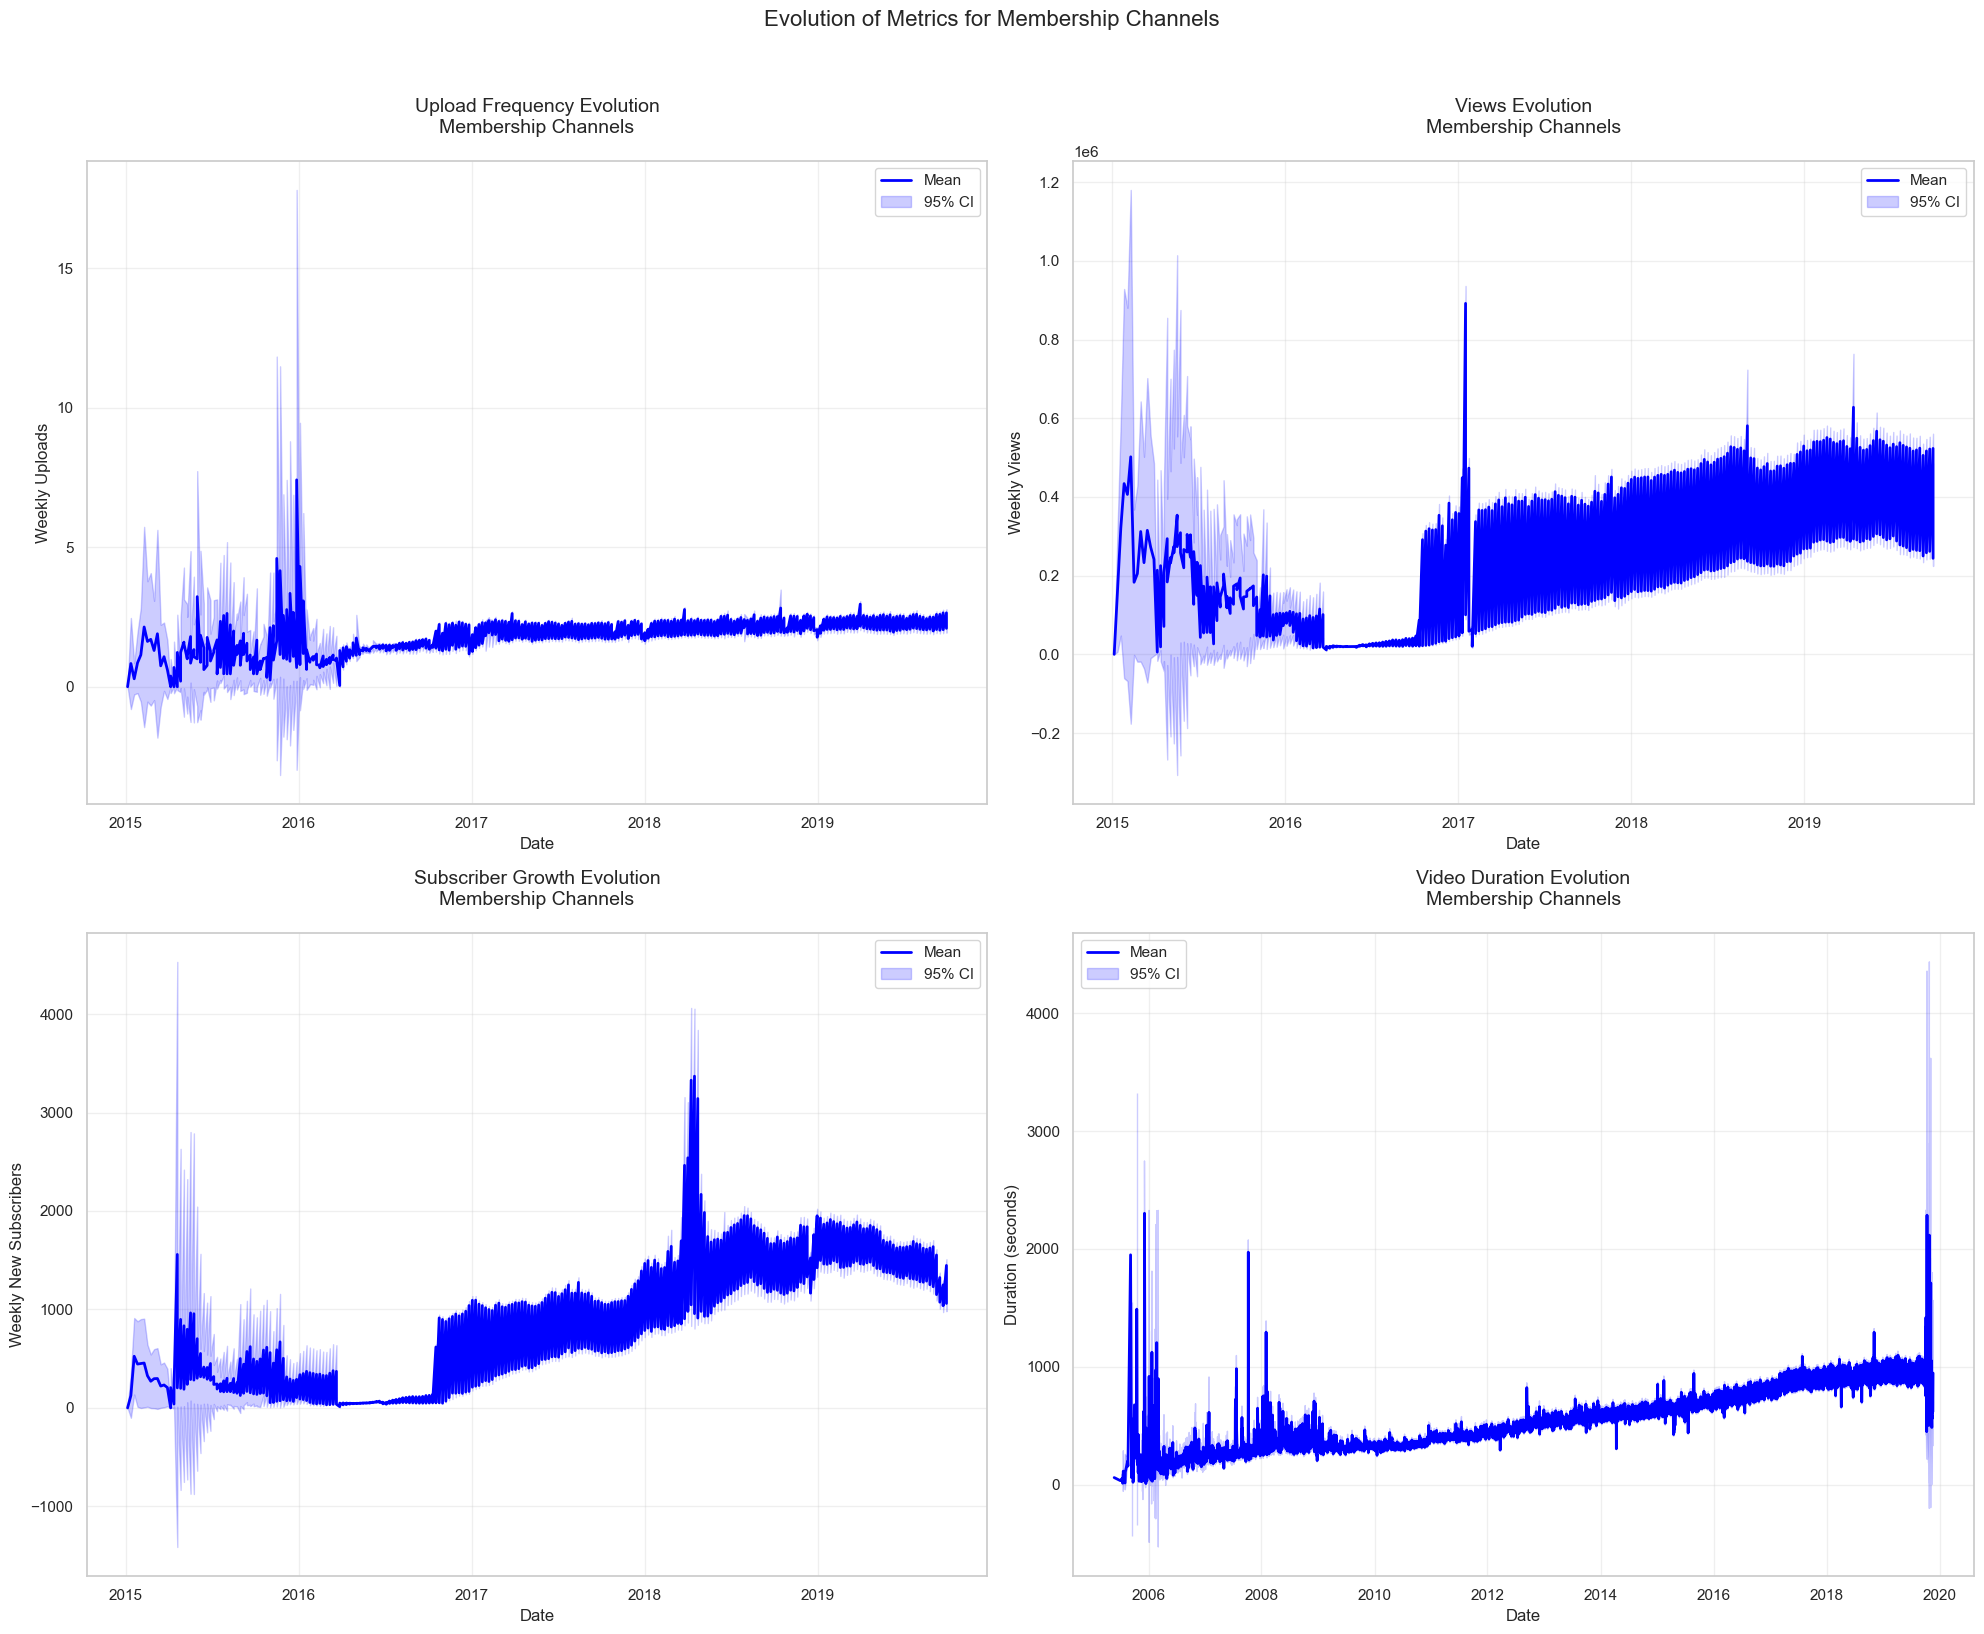


Evolution Analysis for Membership Channels
Number of channels analyzed: 132295

Weekly Uploads:
--------------------------------------------------
Average: 2.24
Standard deviation: 14.80
Minimum: 0.00
Maximum: 31580.00

Weekly Views:
--------------------------------------------------
Average: 384966.65
Standard deviation: 4110980.06
Minimum: 0.00
Maximum: 6659719452.75

Weekly New Subscribers:
--------------------------------------------------
Average: 1334.19
Standard deviation: 18888.71
Minimum: 0.00
Maximum: 20613598.37

Video Duration:
--------------------------------------------------
Average: 761.07
Standard deviation: 1827.23
Minimum: 1.00
Maximum: 360157.00


/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda x: stats.sem(x, nan_policy='omit')
/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda x: stats.sem(x, nan_policy='omit')
/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda x: stats.sem(x, nan_policy='omit')
/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See document

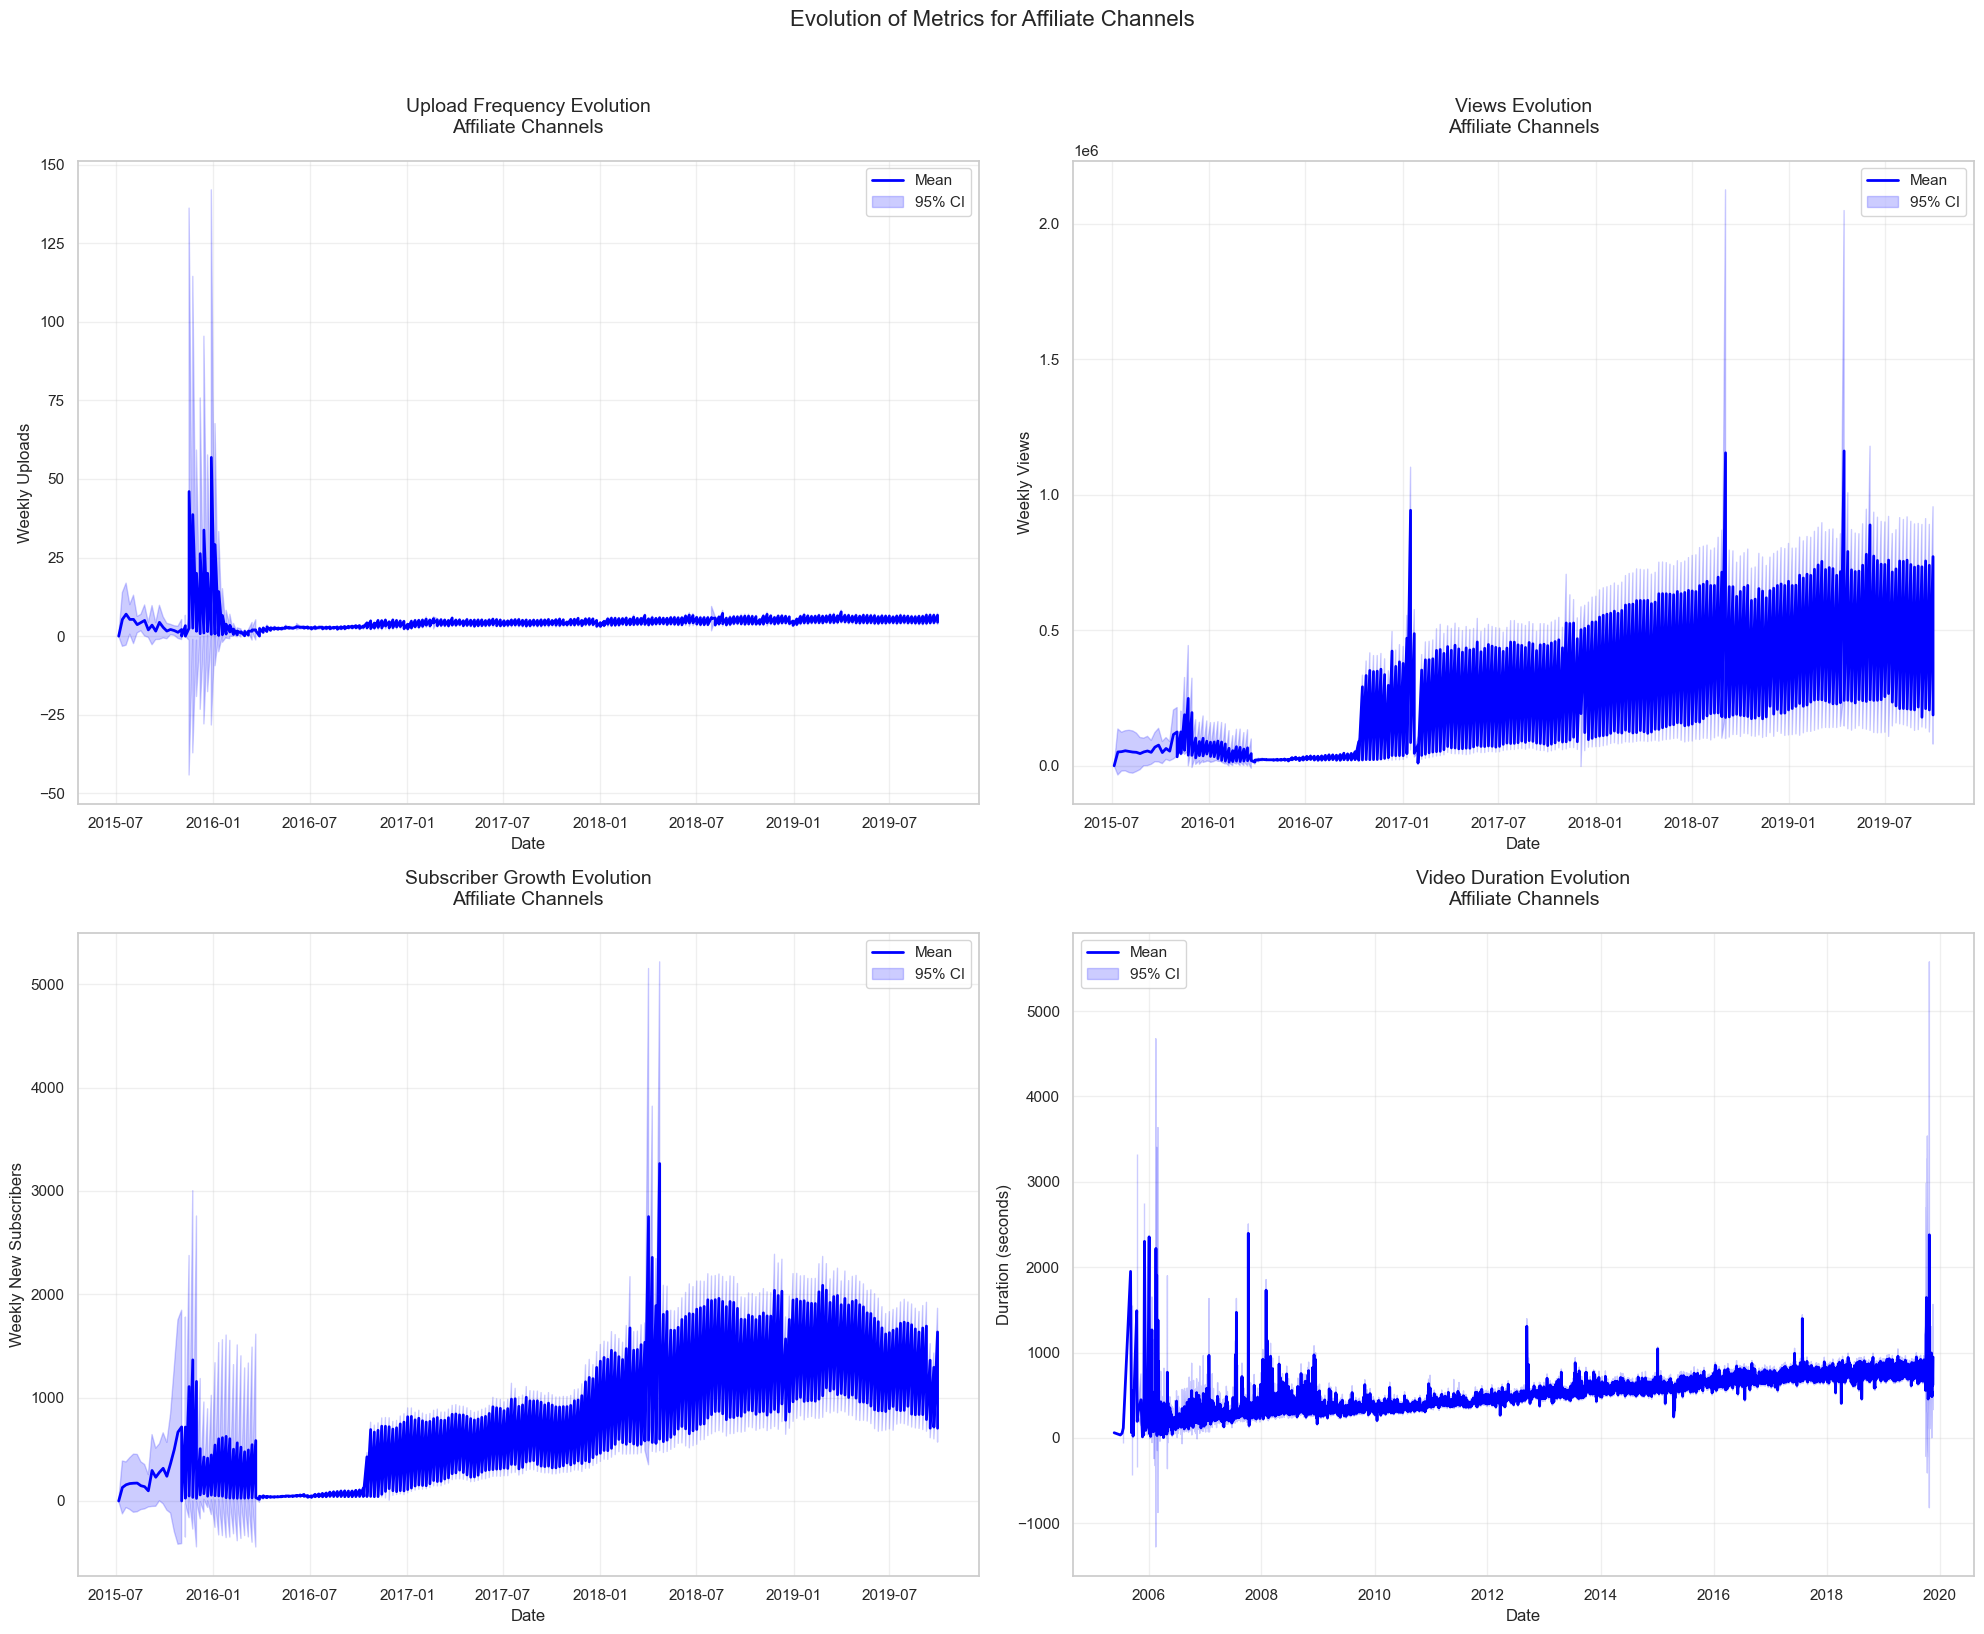


Evolution Analysis for Affiliate Channels
Number of channels analyzed: 17806

Weekly Uploads:
--------------------------------------------------
Average: 5.20
Standard deviation: 24.25
Minimum: 0.00
Maximum: 6240.00

Weekly Views:
--------------------------------------------------
Average: 471622.74
Standard deviation: 8251051.34
Minimum: 0.00
Maximum: 6659719452.75

Weekly New Subscribers:
--------------------------------------------------
Average: 1195.80
Standard deviation: 17373.69
Minimum: 0.00
Maximum: 16306482.34

Video Duration:
--------------------------------------------------
Average: 647.50
Standard deviation: 1647.64
Minimum: 1.00
Maximum: 360157.00


/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda x: stats.sem(x, nan_policy='omit')
/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda x: stats.sem(x, nan_policy='omit')
/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda x: stats.sem(x, nan_policy='omit')
/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_9165/4114206180.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See document

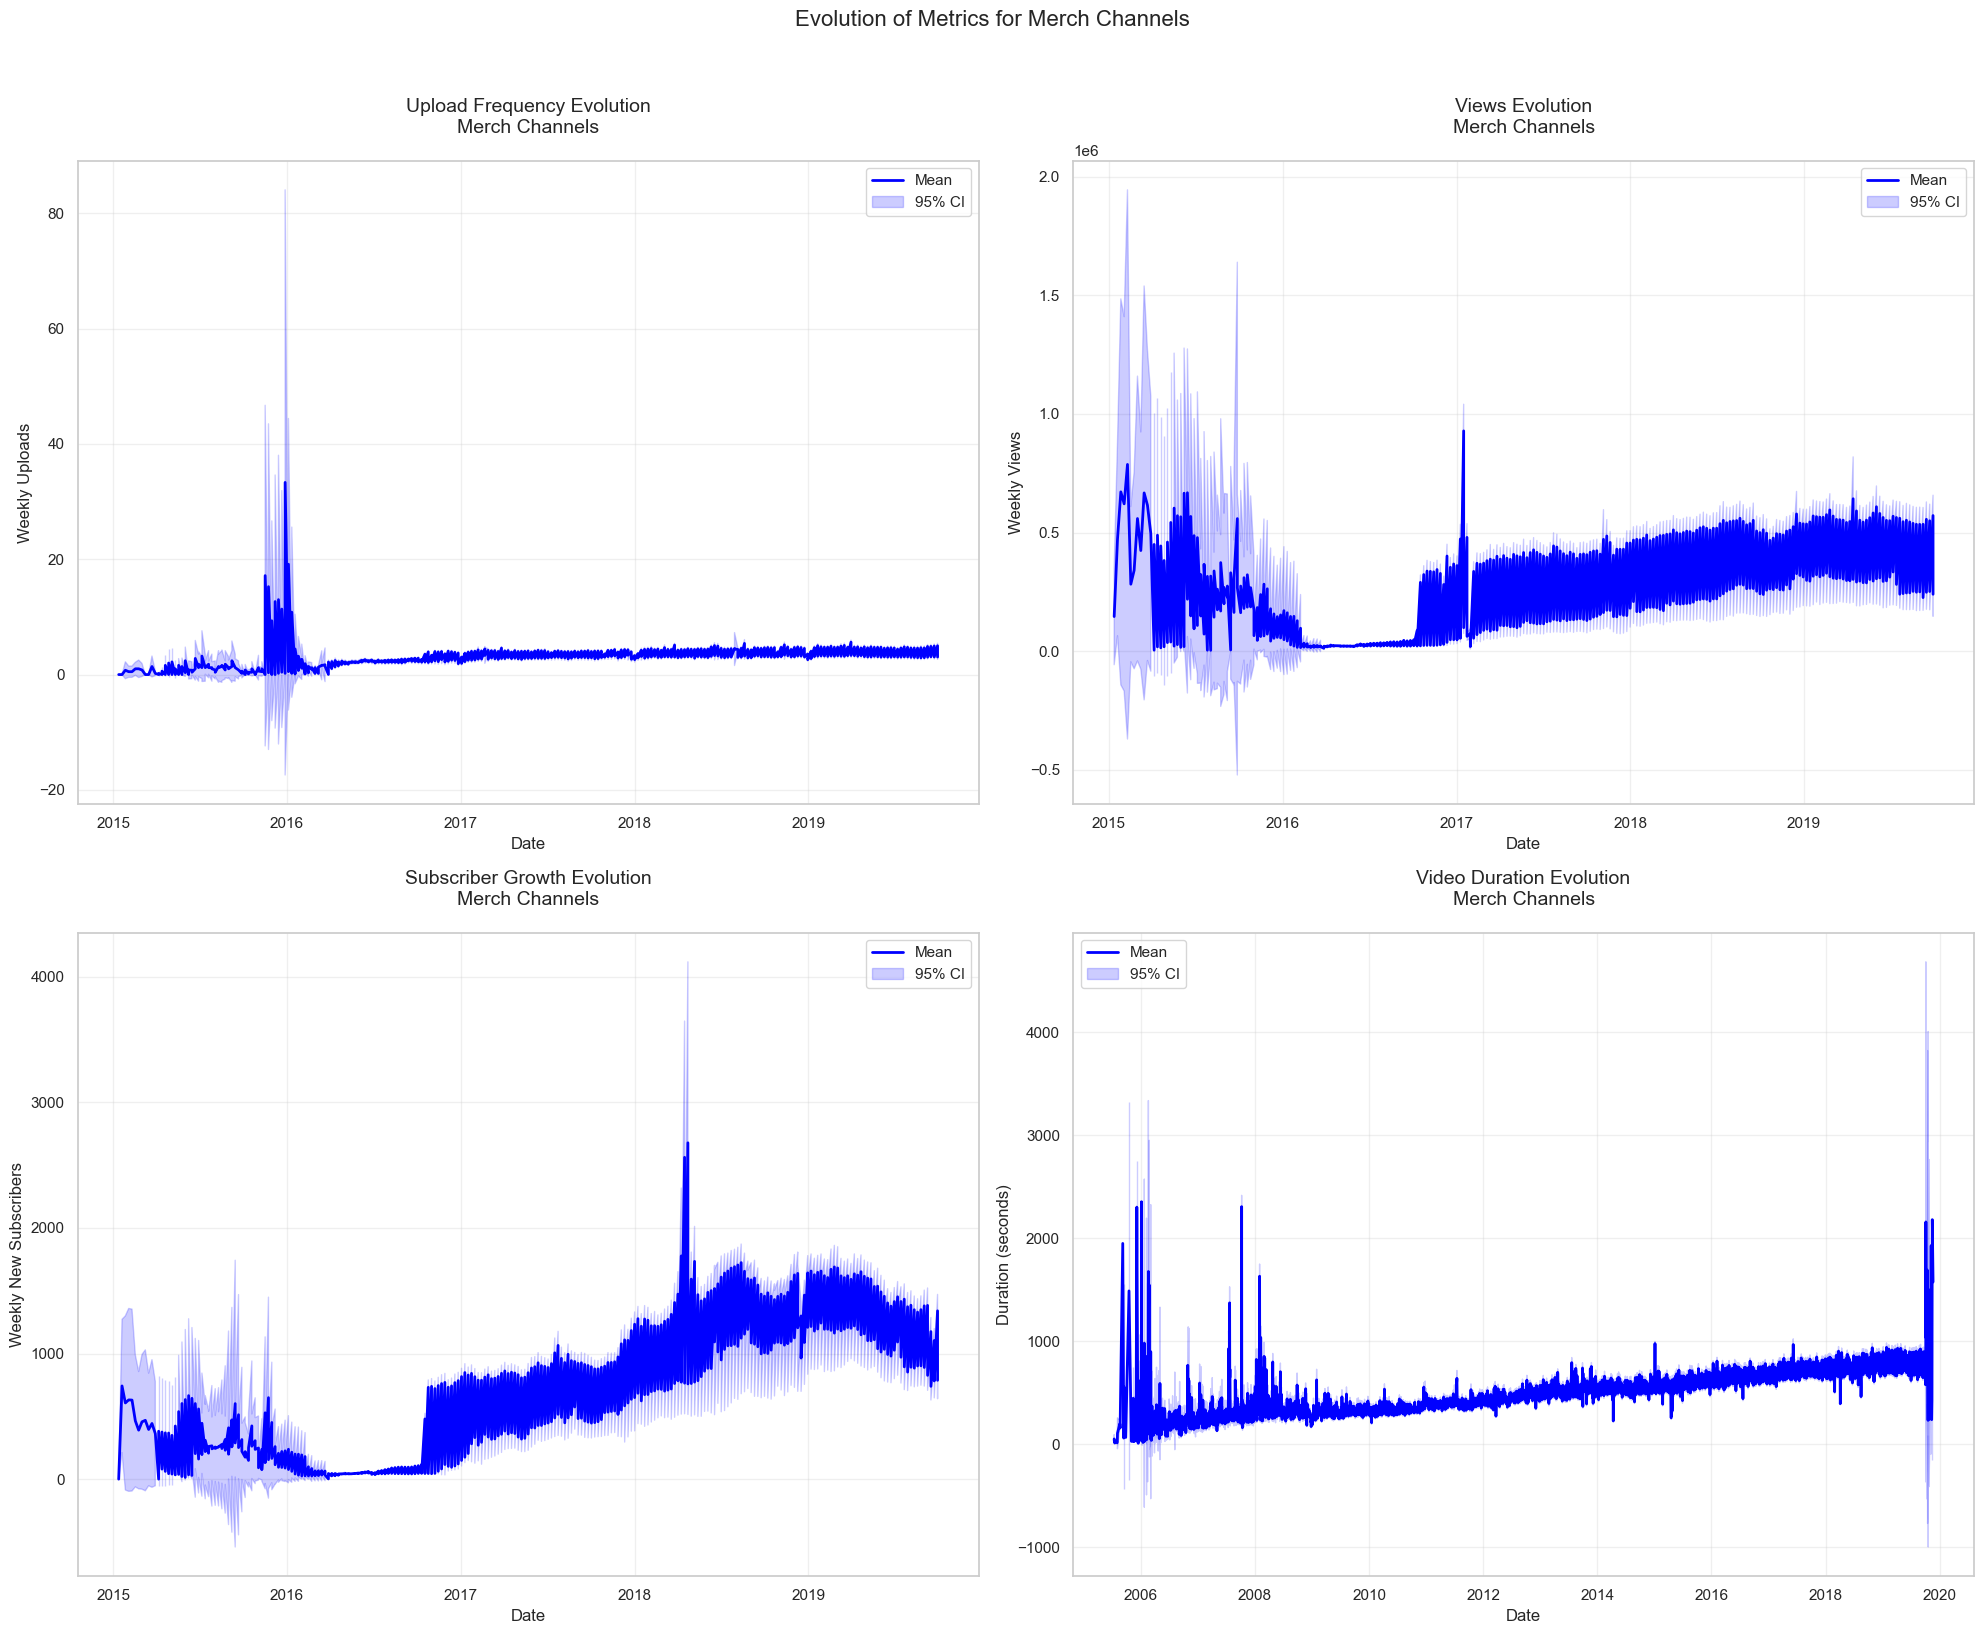


Evolution Analysis for Merch Channels
Number of channels analyzed: 24653

Weekly Uploads:
--------------------------------------------------
Average: 4.00
Standard deviation: 19.12
Minimum: 0.00
Maximum: 6240.00

Weekly Views:
--------------------------------------------------
Average: 402163.35
Standard deviation: 3899472.71
Minimum: 0.00
Maximum: 1600474670.12

Weekly New Subscribers:
--------------------------------------------------
Average: 1095.40
Standard deviation: 12140.18
Minimum: 0.00
Maximum: 13068112.88

Video Duration:
--------------------------------------------------
Average: 618.47
Standard deviation: 1498.73
Minimum: 1.00
Maximum: 172801.00


In [148]:
def analyze_channel_evolution(monetization_type):
    """
    Analyzes temporal evolution of metrics for channels with specific monetization type
    """
    # Create simplified monetization categories
    def simplify_monetization_type(mon_type):
        if pd.isna(mon_type) or mon_type == 'none':
            return 'none'
        elif 'membership' in mon_type:
            return 'membership'
        elif 'affiliate' in mon_type:
            return 'affiliate'
        elif 'merch' in mon_type:
            return 'merch'
        else:
            return 'other'
    
    # Create copy of monetization data with simplified categories
    df_mon_simplified = df_monetization.copy()
    df_mon_simplified['main_monetization'] = df_mon_simplified['monetization_types'].apply(simplify_monetization_type)
    
    # Get channels of this type
    channels = df_mon_simplified[df_mon_simplified['main_monetization'] == monetization_type]['channel_id'].unique()
    
    # Get timeseries data for these channels
    channel_data = df_timeseries_cleaned[df_timeseries_cleaned['channel'].isin(channels)].copy()
    channel_data['datetime'] = pd.to_datetime(channel_data['datetime'])
    
    # Get duration data
    duration_data = df_mon_simplified[df_mon_simplified['channel_id'].isin(channels)].copy()
    duration_data['upload_date'] = pd.to_datetime(duration_data['upload_date'])
    
    # Create figure with 4 subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # Helper function for plotting
    def plot_metric(ax, data, date_col, metric, title, ylabel):
        # Calculate statistics by date
        daily_stats = data.groupby(date_col)[metric].agg([
            'mean', 'count',
            lambda x: stats.sem(x, nan_policy='omit')
        ]).reset_index()
        daily_stats.columns = [date_col, 'mean', 'count', 'sem']
        
        # Calculate confidence intervals
        daily_stats['ci_lower'] = daily_stats['mean'] - 1.96 * daily_stats['sem']
        daily_stats['ci_upper'] = daily_stats['mean'] + 1.96 * daily_stats['sem']
        
        # Plot
        ax.plot(daily_stats[date_col], daily_stats['mean'], 
                color='blue', linewidth=2, label='Mean')
        ax.fill_between(daily_stats[date_col], 
                       daily_stats['ci_lower'], 
                       daily_stats['ci_upper'],
                       color='blue', alpha=0.2, label='95% CI')
        
        ax.set_title(title, pad=20, size=14)
        ax.set_xlabel('Date', size=12)
        ax.set_ylabel(ylabel, size=12)
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    # 1. Upload Evolution
    plot_metric(ax1, channel_data, 'datetime', 'delta_videos',
               f'Upload Frequency Evolution\n{monetization_type.capitalize()} Channels',
               'Weekly Uploads')
    
    # 2. Views Evolution
    plot_metric(ax2, channel_data, 'datetime', 'delta_views',
               f'Views Evolution\n{monetization_type.capitalize()} Channels',
               'Weekly Views')
    
    # 3. Subscribers Evolution
    plot_metric(ax3, channel_data, 'datetime', 'delta_subs',
               f'Subscriber Growth Evolution\n{monetization_type.capitalize()} Channels',
               'Weekly New Subscribers')
    
    # 4. Duration Evolution
    plot_metric(ax4, duration_data, 'upload_date', 'duration',
               f'Video Duration Evolution\n{monetization_type.capitalize()} Channels',
               'Duration (seconds)')
    
    plt.suptitle(f'Evolution of Metrics for {monetization_type.capitalize()} Channels', 
                 size=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nEvolution Analysis for {monetization_type.capitalize()} Channels")
    print("=" * 80)
    print(f"Number of channels analyzed: {len(channels)}")
    
    metrics = {
        'delta_videos': 'Weekly Uploads',
        'delta_views': 'Weekly Views',
        'delta_subs': 'Weekly New Subscribers',
        'duration': 'Video Duration'
    }
    
    for metric, metric_name in metrics.items():
        if metric != 'duration':
            data = channel_data[metric]
        else:
            data = duration_data[metric]
            
        print(f"\n{metric_name}:")
        print("-" * 50)
        print(f"Average: {data.mean():.2f}")
        print(f"Standard deviation: {data.std():.2f}")
        print(f"Minimum: {data.min():.2f}")
        print(f"Maximum: {data.max():.2f}")

# Analyze each monetization type
monetization_types = ['membership', 'affiliate', 'merch']
for mon_type in monetization_types:
    analyze_channel_evolution(mon_type)

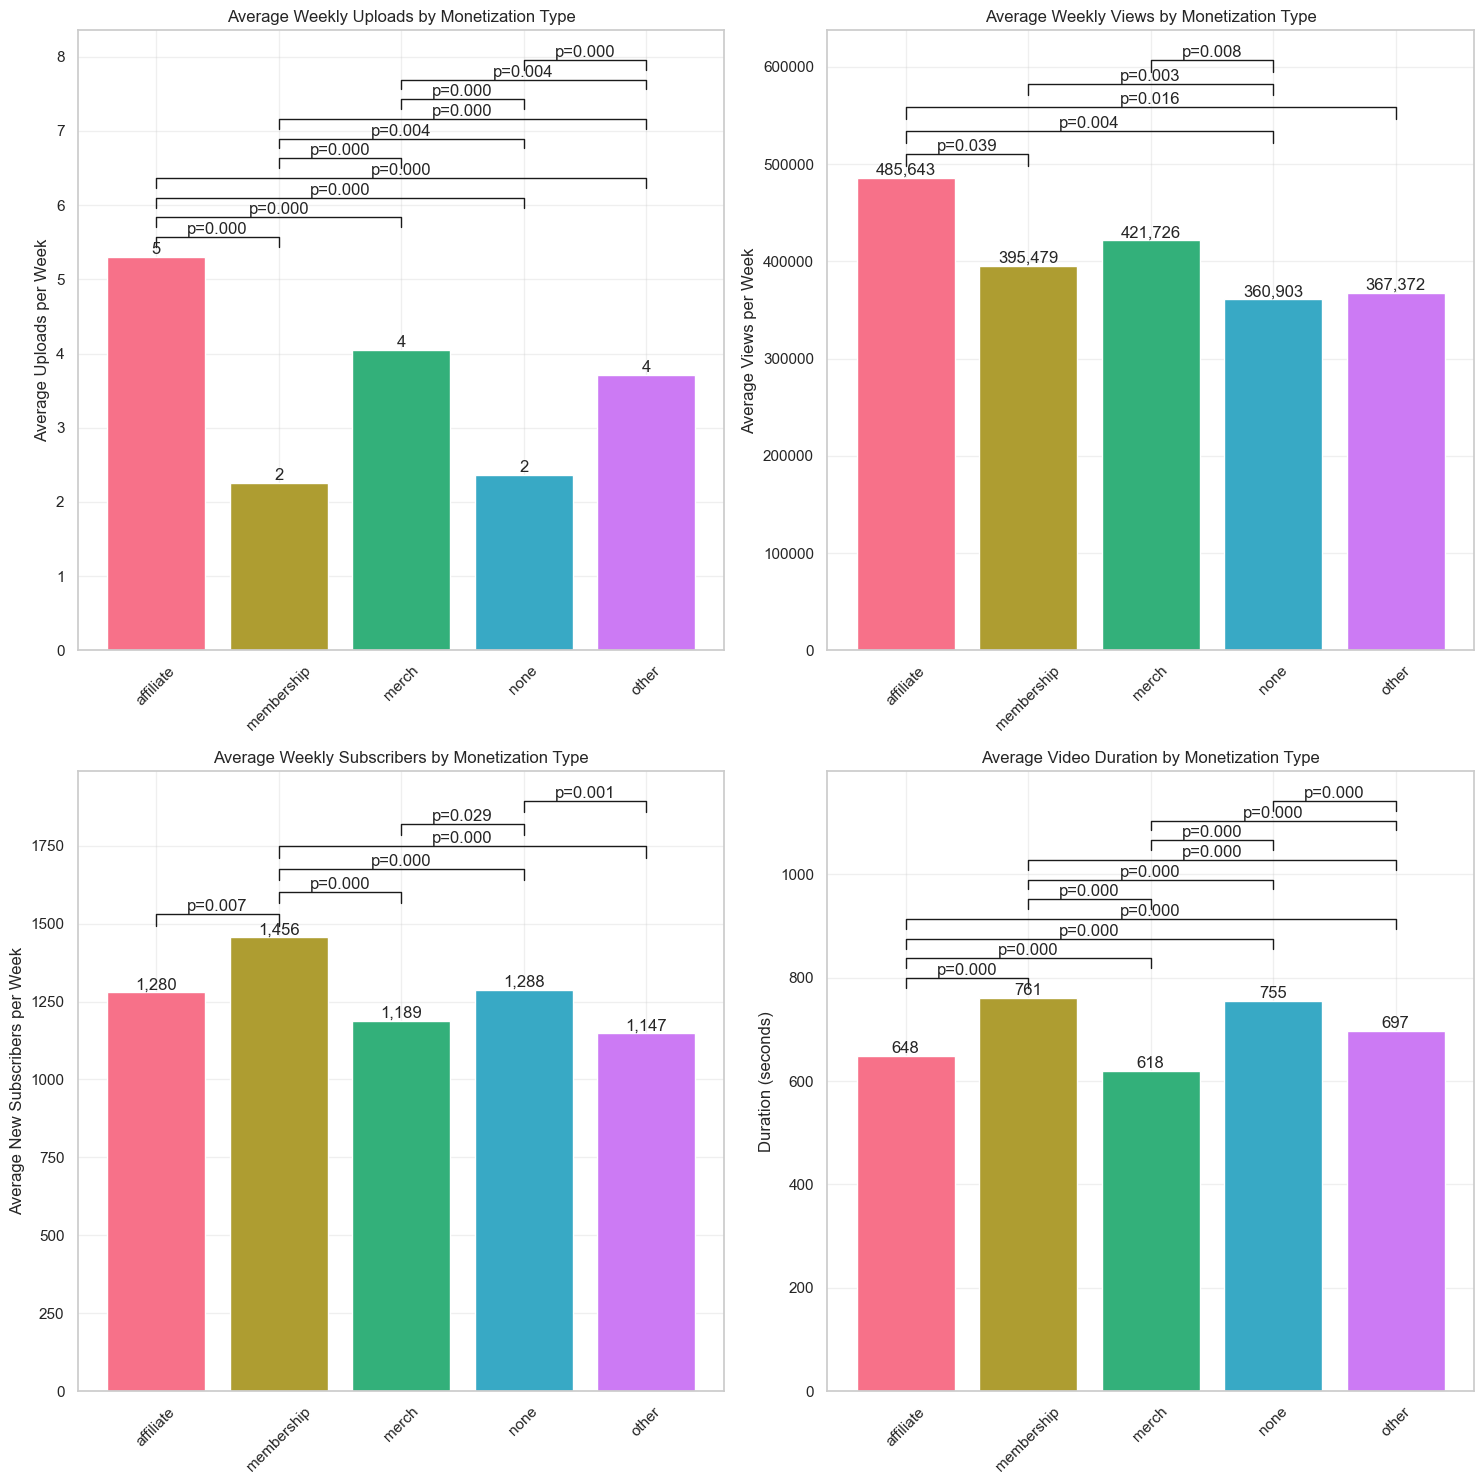

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations

def analyze_trends_by_main_monetization_types():
    
    def simplify_monetization_type(mon_type):
        if pd.isna(mon_type) or mon_type == 'none':
            return 'none'
        elif 'membership' in mon_type:
            return 'membership'
        elif 'affiliate' in mon_type:
            return 'affiliate'
        elif 'merch' in mon_type:
            return 'merch'
        elif 'superchat' in mon_type:
            return 'superchat'
        else:
            return 'other'
    
    df_mon_simplified = df_monetization.copy()
    df_mon_simplified['main_monetization'] = df_mon_simplified['monetization_types'].apply(simplify_monetization_type)
    
    def perform_pairwise_tests(metric_data):
        """
        Perform pairwise t-tests between all groups and return significant pairs
        """
        mon_types = list(metric_data.keys())
        significant_pairs = []
        
        for type1, type2 in combinations(mon_types, 2):
            t_stat, p_val = stats.ttest_ind(metric_data[type1], metric_data[type2], equal_var=False)
            if p_val < 0.05:  # Using 0.05 significance level
                significant_pairs.append((type1, type2, p_val))
        
        return significant_pairs
    
    def analyze_metrics_for_type(mon_type):
        channels = df_mon_simplified[df_mon_simplified['main_monetization'] == mon_type]['channel_id'].unique()
        channel_data = df_timeseries_cleaned[df_timeseries_cleaned['channel'].isin(channels)]
        duration_data = df_mon_simplified[df_mon_simplified['channel_id'].isin(channels)]['duration']
        
        metrics = {
            'num_channels': len(channels),
            'avg_uploads_per_week': channel_data.groupby('channel')['delta_videos'].mean().mean(),
            'med_uploads_per_week': channel_data.groupby('channel')['delta_videos'].mean().median(),
            'avg_views_per_week': channel_data.groupby('channel')['delta_views'].mean().mean(),
            'med_views_per_week': channel_data.groupby('channel')['delta_views'].mean().median(),
            'avg_subs_per_week': channel_data.groupby('channel')['delta_subs'].mean().mean(),
            'med_subs_per_week': channel_data.groupby('channel')['delta_subs'].mean().median(),
            'avg_duration': duration_data.mean(),
            'med_duration': duration_data.median(),
            'raw_data': {
                'uploads': channel_data.groupby('channel')['delta_videos'].mean(),
                'views': channel_data.groupby('channel')['delta_views'].mean(),
                'subs': channel_data.groupby('channel')['delta_subs'].mean(),
                'duration': duration_data
            }
        }
        return metrics
    
    main_types = sorted(df_mon_simplified['main_monetization'].unique())
    results = {mon_type: analyze_metrics_for_type(mon_type) 
              for mon_type in main_types if pd.notna(mon_type)}
    
    # Create visualization subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
    colors = sns.color_palette("husl", len(results))
    
    def plot_metric_with_significance(ax, metric_name, raw_data_key, title, ylabel):
        data = {k: v[metric_name] for k, v in results.items()}
        raw_data = {k: v['raw_data'][raw_data_key] for k, v in results.items()}
        
        # Plot bars
        bars = ax.bar(data.keys(), data.values(), color=colors)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:,.0f}', ha='center', va='bottom')
        
        # Perform and plot significance
        sig_pairs = perform_pairwise_tests(raw_data)
        
        # Add significance markers
        max_height = max(data.values())
        y_offset = max_height * 0.05
        
        for i, (type1, type2, p_val) in enumerate(sig_pairs):
            idx1 = list(data.keys()).index(type1)
            idx2 = list(data.keys()).index(type2)
            y = max_height + y_offset * (i + 1)
            
            # Draw the significance line
            x1 = idx1
            x2 = idx2
            ax.plot([x1, x1, x2, x2], [y-y_offset/2, y, y, y-y_offset/2], 'k-', linewidth=1)
            
            # Add p-value annotation
            ax.text((x1 + x2)/2, y, f'p={p_val:.3f}', ha='center', va='bottom')
    
    # Plot all metrics with significance testing
    plot_metric_with_significance(ax1, 'avg_uploads_per_week', 'uploads',
                                'Average Weekly Uploads by Monetization Type',
                                'Average Uploads per Week')
    
    plot_metric_with_significance(ax2, 'avg_views_per_week', 'views',
                                'Average Weekly Views by Monetization Type',
                                'Average Views per Week')
    
    plot_metric_with_significance(ax3, 'avg_subs_per_week', 'subs',
                                'Average Weekly Subscribers by Monetization Type',
                                'Average New Subscribers per Week')
    
    plot_metric_with_significance(ax4, 'avg_duration', 'duration',
                                'Average Video Duration by Monetization Type',
                                'Duration (seconds)')
    
    plt.tight_layout()
    plt.show()
    

# Run the analysis
analyze_trends_by_main_monetization_types()

"The Path to Monetization: A Tale of YouTube Content Evolution"

Our analysis reveals distinct patterns in how channels evolve with different monetization strategies. Affiliate-monetized channels stand out as the most prolific content producers, averaging 5 uploads per week - more than double the rate of membership-focused channels (2 uploads) and significantly higher than non-monetized channels (2 uploads). This suggests that affiliate partnerships may incentivize more frequent content creation, possibly due to the need to regularly showcase products or services.

When it comes to viewership, affiliate channels also lead the pack, garnering an average of 485,643 weekly views, followed by merchandise-focused channels with 421,726 views. This indicates that affiliate content tends to attract larger audiences, perhaps due to the combination of regular uploads and product-focused content that often aligns with viewer interests and search patterns.

However, the subscriber story tells a different tale. Membership-based channels, despite posting less frequently, achieve the highest weekly subscriber growth at 1,456 new subscribers per week. This suggests that while they produce less content, their videos may be of higher quality or provide more value to viewers, encouraging long-term channel commitment.

The duration analysis provides another interesting insight - non-monetized channels actually produce longer videos (averaging 755 seconds) compared to affiliate channels (648 seconds). This could indicate that monetization strategies might influence content length, with monetized channels potentially optimizing for engagement metrics rather than duration.

Looking at the distributions across channels, we see significant variability within each monetization type, suggesting that success isn't solely tied to monetization strategy. However, the patterns suggest that different monetization approaches might lead to different content strategies:

1. Affiliate channels focus on frequent, shorter content with broad reach
2. Membership channels prioritize subscriber growth through less frequent but potentially more engaging content
3. Merchandise-focused channels maintain a balanced approach between views and engagement
4. Non-monetized channels tend toward longer-form content, perhaps focusing more on creative expression than optimization for revenue

These findings suggest that successful YouTubers adapt their content strategy to align with their chosen monetization approach, rather than following a one-size-fits-all model. The data also hints at a possible evolution in content strategy as channels mature and diversify their revenue streams, with each monetization type potentially serving different stages of a channel's growth journey.
